## **PERSONAL LOAN CAPMAGIN**
**Content**:
* Problem Statment & Objective
* Data Dictionary
* References
* Program
  * Packages Importing & Google Drive Mounting
  * Python Class: for Load Data, Data Pre-check & Data Visualization, Train & Test data split and metrics calcuclation
  * Decision Tree implementation Scikit Learn Package
  * Logistic Regression Scikit learn & STATSModel package
  * KNN using Scikit learn
  * Overall Metrics projection
  * Recommendation
  * Conculsion

________________________________________________________________________________________________________________________________________________________________
***Problem Statement***:
A US Bank(All Life Bank) is doing the Loan campagin to increase their liablity customer to borrow personal Loan also to retain them with their liablity account. In their last financial year campagain they acheived the coversion @9%
This encouraged them to increase their target advertisment campagin to increase their loan account
________________________________________________________________________________
***Objective***: As a data analyst to perform classification alorithm to predict & recommend the suggestion to leverage future growth on the loan account holdings by using below classification alogrithm
* Decision Tree Alogrithm(Scikit learn Packages)
* Logistic Alogrithm(Scikit learn & STATS Model)
* K-Nearest Neighbhour(Scikit learn)
________________________________________________________________________________

**DATA DICTIONARY**
* ID: ID of the Customer
* Age: Custmer completed aged
* Experience: Custmer work experience
* Income: Annual Income of the customer in thousand dollar
* ZIP Code: Customer Residence ZIP Code
* Family: Family size of the customer
* CCAvg: Customer Average spending on credit cards per month in thousand dollar
* Education: Education level of the customer. 1-Under graduate, 2-Graduate, 3- Advance or professional
* Mortgage: Mortgage value of the house in thousand dollar
* Securities Account: denoted that the customer have the securities account
* CD_Account: denotes that whether the customer have certificate of deposit account with the bank
* Online: Does the custmer using online banking
* Credit card: Does the customer use credit card issued by another bank
* Personal_Loan: Did the customer accepted the personal loan or not in previous campgain

________________________________________________________________________________

***REFERNCES***
1. Great Learning Video & Reference material for the Machine learning Alorithm by Professor. Kumar Muthuram Faculty McCombs school of Business, UT Austin & Professor. Abinanda Sarkar Sr. Faculty Data Science.
Link: https://olympus.mygreatlearning.com/courses/121701?th=co&pb_id=18194


2. Scikit Learn Decision Tree: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

3. Scikit learn RandomizedsearchCV: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

4. Scikitlearn GridsearchCV: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

5. Scikit Learn Logistic Algorithm: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

6. Tensorflow Logistic Regression Alogrithm: https://www.tensorflow.org/guide/core/logistic_regression_core

7. Scikit learn Clustering alogrithm: https://scikit-learn.org/1.5/modules/clustering.html

8. Tensorflow: Clustering algorithm: https://www.tensorflow.org/federated/api_docs/python/tff/learning/algorithms/build_fed_kmeans?form=MG0AV3






### PACKAGES IMPORTING & MOUNTING GOOGLE DRIVE

In [1]:
!pip install uszipcode

In [12]:
!pip install sqlalchemy-mate==2.0.0.0


  Attempting uninstall: sqlalchemy-mate
    Found existing installation: sqlalchemy_mate 2.0.0.3
    Uninstalling sqlalchemy_mate-2.0.0.3:
      Successfully uninstalled sqlalchemy_mate-2.0.0.3


In [ ]:
import pandas as pd
from uszipcode import SearchEngine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load your dataset
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Age': [45, 34, 50, 29, 55, 35, 28, 36, 39, 41, 37, 33, 50, 48],
    'Experience': [19, 10, 23, 8, 31, 6, 4, 13, 16, 18, 12, 9, 25, 27],
    'Income': [30, 80, 67, 23, 120, 28, 59, 19, 60, 37, 78, 62, 24, 55],
    'ZIP Code': [98052, 98007, 98008, 98052, 98006, 98007, 98005, 98004, 98008, 98052, 98007, 98005, 98004, 98006],
    'Family': [1, 2, 3, 4, 2, 1, 4, 3, 4, 1, 3, 4, 1, 2],
    'CCAvg': [1.6, 2.1, 1.5, 0.8, 3.5, 1.2, 1.8, 2.5, 3.0, 2.0, 2.6, 1.5, 1.0, 0.5],
    'Education': ['Undergrad', 'Graduate', 'Undergrad', 'Undergrad', 'Advanced', 'Graduate', 'Undergrad', 'Graduate', 'Advanced', 'Graduate', 'Undergrad', 'Graduate', 'Advanced', 'Undergrad'],
    'Mortgage': [0, 0, 0, 100, 0, 0, 0, 120, 0, 0, 90, 0, 0, 0],
    'Personal_Loan': [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    'Securities_Account': [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0],
    'CD_Account': [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    'Online': [0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0],
    'CreditCard': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Initialize the search engine
search = SearchEngine(simple_zipcode=True)

# Function to get additional data from ZIP Code
def get_zipcode_data(zipcode):
    zip_info = search.by_zipcode(zipcode)
    if zip_info:
        return {
            'Population': zip_info.population,
            'Median_Household_Income': zip_info.median_household_income,
            'Land_Area': zip_info.land_area_in_sqmi,
            'Water_Area': zip_info.water_area_in_sqmi
        }
    else:
        return {
            'Population': None,
            'Median_Household_Income': None,
            'Land_Area': None,
            'Water_Area': None
        }

# Apply the function to get additional ZIP Code data
zipcode_data = df['ZIP Code'].apply(get_zipcode_data)
zipcode_df = pd.DataFrame(zipcode_data.tolist())


In [2]:
import pandas as pd
from uszipcode import SearchEngine



/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
'''
Importing packages needed for the project
pandas- Data analysis and computing
numpy-scientific computation
matlpotlib & seaborn- data visualization
tensorflow- deep learning algorithm
sklearn - for Decision tree MAchine learning algorithm
'''
# !pip install scikeras
# !pip install keras-tuner
# !pip install scikit-learn==0.24.2
# !pip install --upgrade scikeras
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #Data analysis and computing
import numpy as np # Scientific Computation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import tensorflow as tf # Deep learning Alogrithm
from tensorflow.keras.metrics import Accuracy, Precision, Recall,F1Score # Deep learning Alogrithm
from tensorflow.keras.callbacks import EarlyStopping # to stop the Epoch once condition acheived
import traceback # exception traceback
from collections import Counter
from multiprocessing import Pool
from sklearn.linear_model import LogisticRegression # Logistic Regression Alogrithm
from sklearn.neighbors import KNeighborsClassifier # KNN Alogrithm
from sklearn.model_selection import train_test_split # To split the dataset into train and test data
from sklearn.preprocessing import StandardScaler # To standardize the data
from sklearn.model_selection import GridSearchCV # Hyperprameter tuning cross validation
from sklearn.model_selection import RandomizedSearchCV #Hyperparameter tuning
from sklearn.model_selection import cross_val_score # Cross validation
from sklearn.tree import DecisionTreeClassifier # Decision Tree Alogrithm
from sklearn import tree # Decision tree
from sklearn.metrics import (confusion_matrix,recall_score,f1_score,accuracy_score,precision_score,classification_report) #Metrics calculation
from sklearn.metrics import roc_curve, auc, RocCurveDisplay #TO PLOT THE ROC AUC CURVE
from scipy.stats import randint #random int generation
from sklearn.linear_model import LogisticRegression ## Logistic Regression model
import statsmodels.stats.api as sms ##Stats model package for logistic regression
import statsmodels.api as sm ##Stats model package for logistic regression
from statsmodels.stats.outliers_influence import variance_inflation_factor ##Stats model package for logistic regression
from statsmodels.tools.tools import add_constant ##Stats model package for logistic regression
from sklearn.calibration import CalibratedClassifierCV #To Calibrate the classifier algorithm
from sklearn.utils.class_weight import compute_class_weight #To compute the class weight
from imblearn.over_sampling import SMOTE # To resample the scalled dataset
#from scikeras.wrappers import KerasClassifier # Keras wrapper for classifier algorithm






'''
  Mounted my Google Drive to fetch the dataset Loan_Modelliing.csv
'''
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/'
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive
 Archives  'Colab Notebooks'   Loan_Modelling.csv   Others   PGP_AI_ML_GREAT_LEARNING


## Python Class Load Data, Precheck & Data Visualization



In [ ]:
'''
This class load the dataset into the panda dataframe
also this class perform the dataset overview
'''

class Loan_Modelling:
  ## Constructor function
  def __init__(self):
    print('Constructor')

  # To Load the dataset
  def Load_DataSet(self,file_name):
    return pd.read_csv(file_name)

  def DataSet_OverView(self,df):
    try:
      print('*'*100)
      print('Dataset OverView')
      print('Number of Rows in the Dataset: ', df.shape[0])
      print('Number of columns in Dataset: ', df.shape[1])

      print('-'*100)
      print('Data set Information')
      # To get the dataframe datatype information
      df_info = df.info()

      print(df_info)

      print('-'*100)
      print('Dataset Statistical summary')
      #To get the dataframe stats
      df_describe = df.describe(include='all')

      print(df_describe)

      print('-'*100)
      print('Top 5 rows from the dataset')
      # To print the top 5 rows in dataframe
      print(df.head(5))

      print('-'*100)

      print('-'*100)
      print('Last 5 rows from the dataset')
      # To print the last 5 rows in dataframe
      print(df.tail(5))

      print('-'*100)

    except Exception as ex:
      print('Exception Occured: ', ex)
      traceback.print_exc()

In [ ]:
'''
To do the null check and duplicate check in the dataframe
'''

class Dataset_Precheck:
  def __init__(self):
    print('EDA_LoadModelling class Constructor')

  # To check the null values in the dataframe
  def Check_The_NullValues(self,df):

    nullval = df.isnull().sum()

    print('-'*100)
    print('Checking the Null Values in the dataset')
    print(nullval)

    if nullval.sum() == 0:
      print('No Null values present in the dataset')
    else:
      print('Null Values present in the dataset')
    print('-'*100)

  # To check the duplicate rows in the dataframe
  def Check_The_Duplicated_Rows(self,df):
    print('-'*100)
    print('checking for the duplicate rows present in the dataset or not')

    duplicate_row_count = df[df.duplicated()]

    if(duplicate_row_count.shape[0] == 0):
      print('NO Duplicate rows present in the Dataset')
    else:
      print('Duplicate rows are present in the Dataset')
      print('Number of the duplicate rows present in the dataset: ',duplicate_row_count.shape[0])

    print('-'*100)

In [ ]:
'''
Dataset Visualization
Univariate and Multivariate Analysis
'''
class Dataset_Visualization:
  def __init__(self,df):
    print('Data set visualization')
    self.df = df
    #self.column_names = df.select_dtypes(include=['int64','float64']).columns
    self.column_names = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']
    self.cross_tab_col =['Education','Family','Securities_Account','CD_Account','Online','CreditCard']
    self.target_column=['Personal_Loan']
    self.heatmap_column =['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
    self.scatter_column = ['Age','Income','CCAvg','Mortgage','Experience']

  # To print the univariate and multivariate analysis
  def Print_The_Plot(self):
    self.univariate_HistPlot()
    self.BoxPlotAnalysis()
    self.multivariate_countplot()
    self.multivariate_HeatMap()
    self.crosstab_plot()
    self.univariate_kdeploat()
    self.mulitvariate_pairplot()

  # Histplot for the numeric column
  def univariate_HistPlot(self):
    print('univariate Analysis')

    plt.figure(figsize=(15,10))
    for indx,col_plt in enumerate(self.column_names):
      plt.subplot(5,3,indx+1)

      sns.histplot(data = self.df, x=col_plt,kde=True,color='green')

    plt.tight_layout()
    plt.show()

  # Box plot analysis
  def BoxPlotAnalysis(self):
    plt.figure(figsize=(15,10))
    for indx,col_plt in enumerate(self.column_names):
      plt.subplot(4,3,indx+1)

      sns.boxplot(data = self.df, x='Personal_Loan',y=col_plt,color= 'lightblue')

    plt.tight_layout()
    plt.show()

  #cross tab plot
  def crosstab_plot(self):
    plt.figure(figsize=(15,10))
    for indx,col_plt in enumerate(self.cross_tab_col):
      plt.subplot(len(self.cross_tab_col)//3+1,3,indx+1)
      #plt.subplot(6,1,indx+1)
      tab=pd.crosstab(self.df[col_plt],self.df['Personal_Loan'],normalize='index').sort_values(by=0,ascending=False)
      tab.plot(kind='bar',stacked=True,ax=plt.gca())
      plt.xlabel(col_plt)
      plt.ylabel('Percentage')

      plt.legend(labels=['No','Yes'])
    plt.tight_layout
    plt.show()

  def map_scatter_plot(self):
    plt.figure(figsize=(12,7))
    for indx, col_plt in enumerate(self.scatter_column):
      plt.subplot(len(self.cross_tab_col)//3+1,3,indx+1)
      sns.scatterplot(data=self.df, x=col_plt,y='Personal_Loan',hue='Personal_Loan')
      plt.tight_layout()
    plt.show()

    plt.figure(figsize=(5,5))
    sns.scatterplot(data=self.df, x='Age',y='Income')
    plt.tight_layout()
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.show()

    plt.figure(figsize=(5,5))
    sns.scatterplot(data=self.df, x='Experience',y='Income')
    plt.tight_layout()
    plt.xlabel('Experience')
    plt.ylabel('Income')
    plt.show()

    plt.figure(figsize=(5,5))
    sns.scatterplot(data=self.df, x='CCAvg',y='Mortgage')
    plt.tight_layout()
    plt.xlabel('CCAvg')
    plt.ylabel('Mortgage')
    plt.show()

    plt.figure(figsize=(5,5))
    sns.scatterplot(data=self.df, x='Income',y='Mortgage')
    plt.tight_layout()
    plt.xlabel('Income')
    plt.ylabel('Mortgage')
    plt.show()

    plt.figure(figsize=(5,5))
    sns.scatterplot(data=self.df, x='Income',y='CCAvg')
    plt.tight_layout()
    plt.xlabel('Income')
    plt.ylabel('CCAvg')
    plt.show()



  def univariate_kdeploat(self):
    plt.figure(figsize=(15,10))
    for indx, col_plt in enumerate(self.column_names):
      plt.subplot(5,3,indx+1)
      #plt.subplot(len(self.cross_tab_col)//3+1,3,indx+1)
      sns.kdeplot(data = self.df, x=col_plt,color='red')

    plt.tight_layout()
    plt.show()

  def mulitvariate_pairplot(self):
    plt.figure(figsize=(15,10))
    sns.pairplot(self.df, hue ='Personal_Loan', palette ='bright')
    plt.show()

  def multivariate_HeatMap(self):
    plt.figure(figsize=(10,7))
    sns.heatmap(self.df[self.heatmap_column].corr(numeric_only=True),annot=True,cmap='Spectral',fmt='.2f')
    plt.show()

  def multivariate_countplot(self):
    plt.figure(figsize=(5,5))
    sns.countplot(data=self.df, x='Personal_Loan',color='green')








## TEST TRAIN SPLIT, SCALAR TRANSFORM & SMOTE RESAMPLING

Split_Train_Test
  1. segregatting the dataset into Attribute and Target
  2. Spliting the Attribute and Target into Test and Train with seed of random state 42 and equally splitting the Target for Test and Train

scaler_transform:
  1. To standardize the dataset by removing the mean and scaling to variance unit
  2. formula z = (x-Feature_mean)/Feature_SD

SMOTE_Resample:
  1. Synthetic Minority Over-sampling Technique == > SMOTE
  2. To address the class imbalance issue

In [ ]:
'''
Split_Train_Test
  1. segregatting the dataset into Attribute and Target
  2. Spliting the Attribute and Target into Test and Train with seed of random state 42 and equally splitting the Target for Test and Train

scaler_transform:
  1. To standardize the dataset by removing the mean and scaling to variance unit
  2. formula z = (x-Feature_mean)/Feature_SD

SMOTE_Resample:
  1. Synthetic Minority Over-sampling Technique == > SMOTE
  2. To address the class imbalance issue

'''

class DatSetSplit_And_MetricsCalculation:
  def __init__(self,df):
    self.df = df

  '''
  1. segregatting the dataset into Attribute and Target
  2. Spliting the Attribute and Target into Test and Train with seed of random state 42 and equally splitting the Target for Test and Train
  '''
  def Split_Train_Test(self):
    df_Features = self.df.drop(['ID','ZIPCode','Personal_Loan'],axis =1)
    df_Target = self.df['Personal_Loan']
    print('-'*100)
    print('Feature data count before split:',df_Features.shape[0],'rows and ',df_Features.shape[1],'columns')
    print('Target data count before split:',df_Target.shape[0])

    Attribute_Train, Attribute_Test, Target_Train, Target_Test = train_test_split(df_Features,df_Target, test_size = 0.2, random_state = 42, stratify = df_Target)
    print('-'*100)
    print('After Split the dataset')
    print('Feature Train:', Attribute_Train.shape[0],'rows and ',Attribute_Train.shape[1],' columns')
    print('Feature Test:', Attribute_Test.shape[0], ' rows and ', Attribute_Test.shape[1],' columns')
    print('Target Train:', Target_Train.shape[0],'rows')
    print('Target Test:', Target_Test.shape[0],'rows')

    return Attribute_Train, Attribute_Test, Target_Train, Target_Test

  def Scaler_Transform(self,Attribute_Train, Attribute_Test):
    scaler = StandardScaler()
    Attribute_Train_scaled = scaler.fit_transform(Attribute_Train)
    Attribute_Test_scaled = scaler.fit_transform(Attribute_Test)

    return Attribute_Train_scaled, Attribute_Test_scaled

  def SMOTE_Resample(self, Attribute_Train_Scaled,Target_Trained):
    smote_model = SMOTE(random_state = 42)
    Attribute_Train_resample, Target_Train_resample = smote_model.fit_resample(Attribute_Train_Scaled,Target_Trained)

    print('-'*100)
    print('After SMOTE Resample')
    print('Attribute Train: ',Attribute_Train_resample.shape[0],'rows and ',Attribute_Train_resample.shape[1],'columns')
    print('Target Train: ',Target_Train_resample.shape[0],'rows')

    return Attribute_Train_resample, Target_Train_resample


  # TO calculate the metrics
  def Calculating_Metrics(self, Target, Predicted_Target,sampleType,Algorithm,Package_type):
    print('-'*100)
    print('Calculating The Metrics')
    Target_Accuracy = accuracy_score(Target,Predicted_Target)
    Target_Precision = precision_score(Target,Predicted_Target)
    Target_Recall = recall_score(Target, Predicted_Target)
    Target_F1Score =f1_score(Target, Predicted_Target)
    Target_Confusion = confusion_matrix(Target, Predicted_Target)
    Target_Class = classification_report(Target,Predicted_Target)
    print(Target_Class)

    False_Positive_Rate, True_Positive_Rate, Thresholds = roc_curve(Target, Predicted_Target)
    roc_auc = auc(False_Positive_Rate, True_Positive_Rate)



    df_Metrics = pd.DataFrame({'Algorithm':[Algorithm],'Package Type':[Package_type],'Sample Type':[sampleType],'Accuracy':[Target_Accuracy],
                               'Precision':[Target_Precision],'Recall':[Target_Recall],'F1-Score':[Target_F1Score]})

    confusion_label = np.asarray([["{0:0.0f}".format(item)+"\n{0:.2}".format(item/Target_Confusion.flatten().sum())]
                                for item in Target_Confusion.flatten()]).reshape(2,2)

    plt.figure(figsize=(2,2))
    sns.heatmap(Target_Confusion,annot=confusion_label,cmap='Spectral',fmt='')
    plt.ylabel('Acutal')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix '+sampleType)
    plt.show()

    plt.figure(figsize=(5,3))
    plt.plot(False_Positive_Rate,True_Positive_Rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],color='green',lw=2,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve '+sampleType)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    return df_Metrics



## Basic Python class function invoking

In [ ]:
#create object and invoke the class
objloan = Loan_Modelling()
## Load Dataset
df_LoanModelling = objloan.Load_DataSet('Loan_Modelling.csv')

## DATA SET OVERVIEW
objloan.DataSet_OverView(df_LoanModelling)

Overall_Test_Metrics = pd.DataFrame()
Overall_Train_Metrics = pd.DataFrame()

Constructor
****************************************************************************************************
Dataset OverView
Number of Rows in the Dataset:  5000
Number of columns in Dataset:  14
----------------------------------------------------------------------------------------------------
Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 n

In [ ]:
# Invoke the class for the Dataset pre check
objEDA = Dataset_Precheck()
objEDA.Check_The_NullValues(df_LoanModelling)

objEDA.Check_The_Duplicated_Rows(df_LoanModelling)

EDA_LoadModelling class Constructor
----------------------------------------------------------------------------------------------------
Checking the Null Values in the dataset
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
No Null values present in the dataset
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
checking for the duplicate rows present in the dataset or not
NO Duplicate rows present in the Dataset
----------------------------------------------------------------------------------------------------


In [ ]:
# Visualization
obj_dataVisual = Dataset_Visualization(df_LoanModelling)


Data set visualization


### Observation ScatterPlot
* CCAvg vs mortgage Customer who has less CCAvg have less mortgage
* Income Vs Mortgage => for high income customer mortgage also increases which implies that more income earning customer taking mortgage of high amount, majjority customers who earns less than 100k$ has less mortgage(below 300k dollar)
* Invome Vs ccavg => Customer who eraning more spending more on Credit card

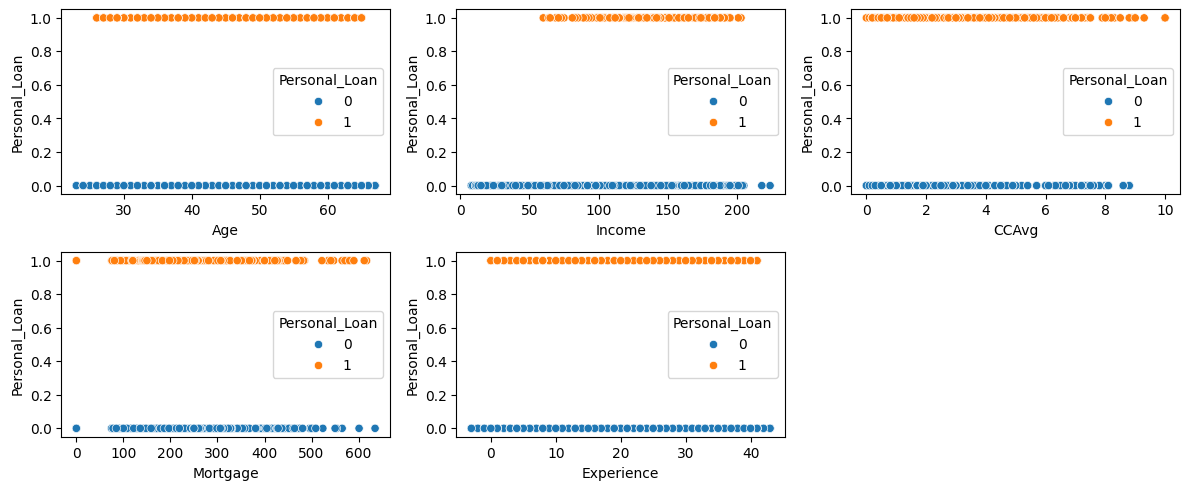

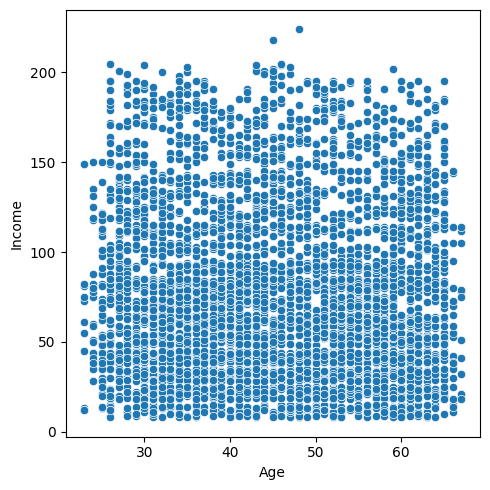

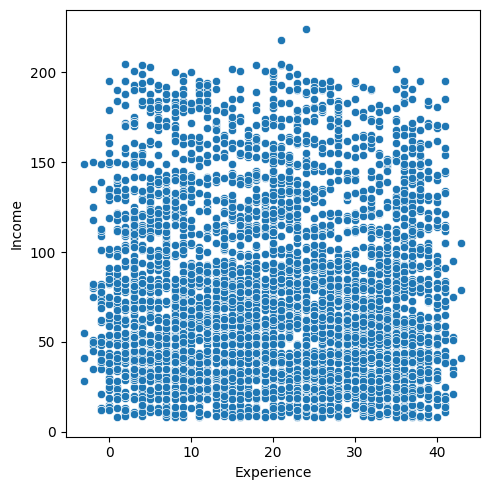

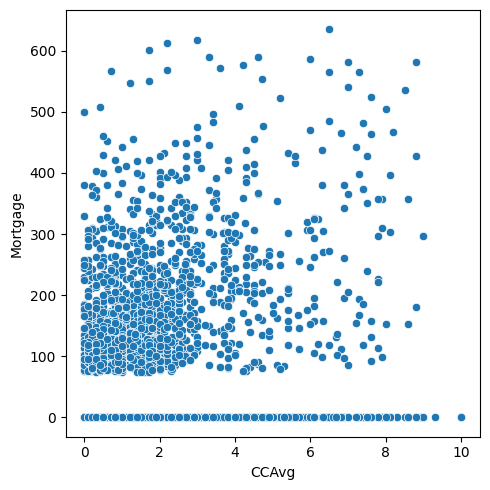

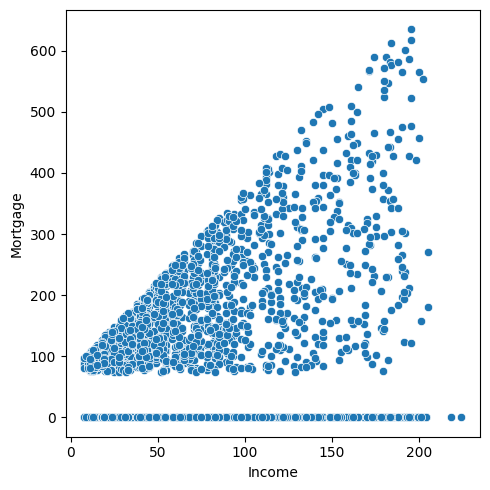

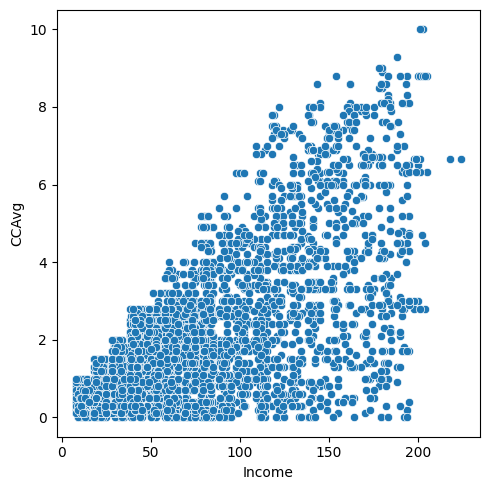

In [ ]:
obj_dataVisual.map_scatter_plot()

## Histplot

* Income and CCAvg is left skewed
* Age and Experience are distributed normal

univariate Analysis


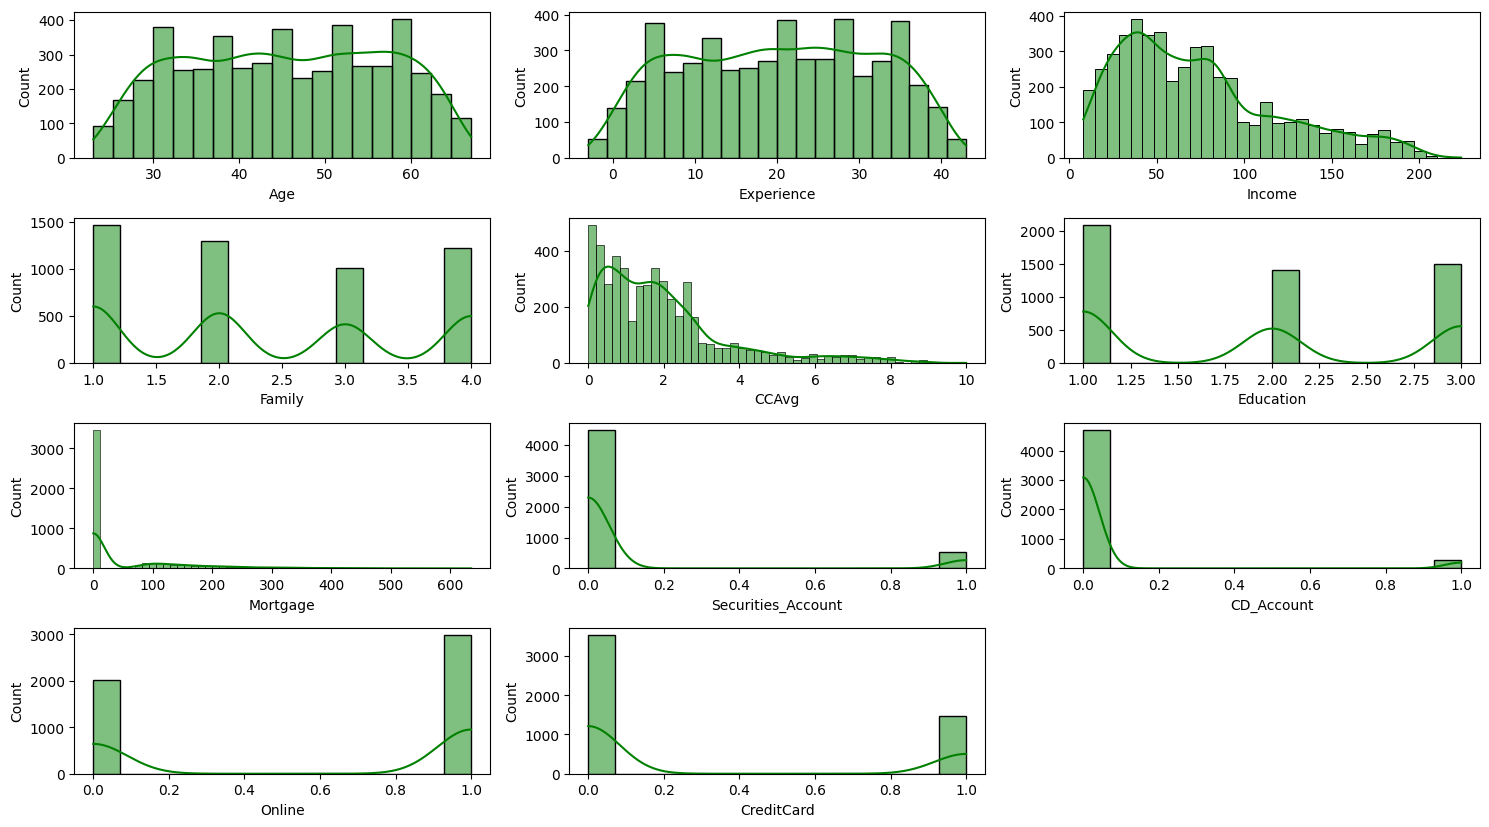

'\nAge & Experience: Smooth distribution across ages\nIncome & CCAvg:Left Skewed\n\n\n'

In [ ]:
obj_dataVisual.univariate_HistPlot()

'''
Age & Experience: Smooth distribution across ages
Income & CCAvg:Left Skewed


'''

## BOX PLOT

Observation
1. Income is high who taken the load
2. Outliers in the CCAvg , Outliers


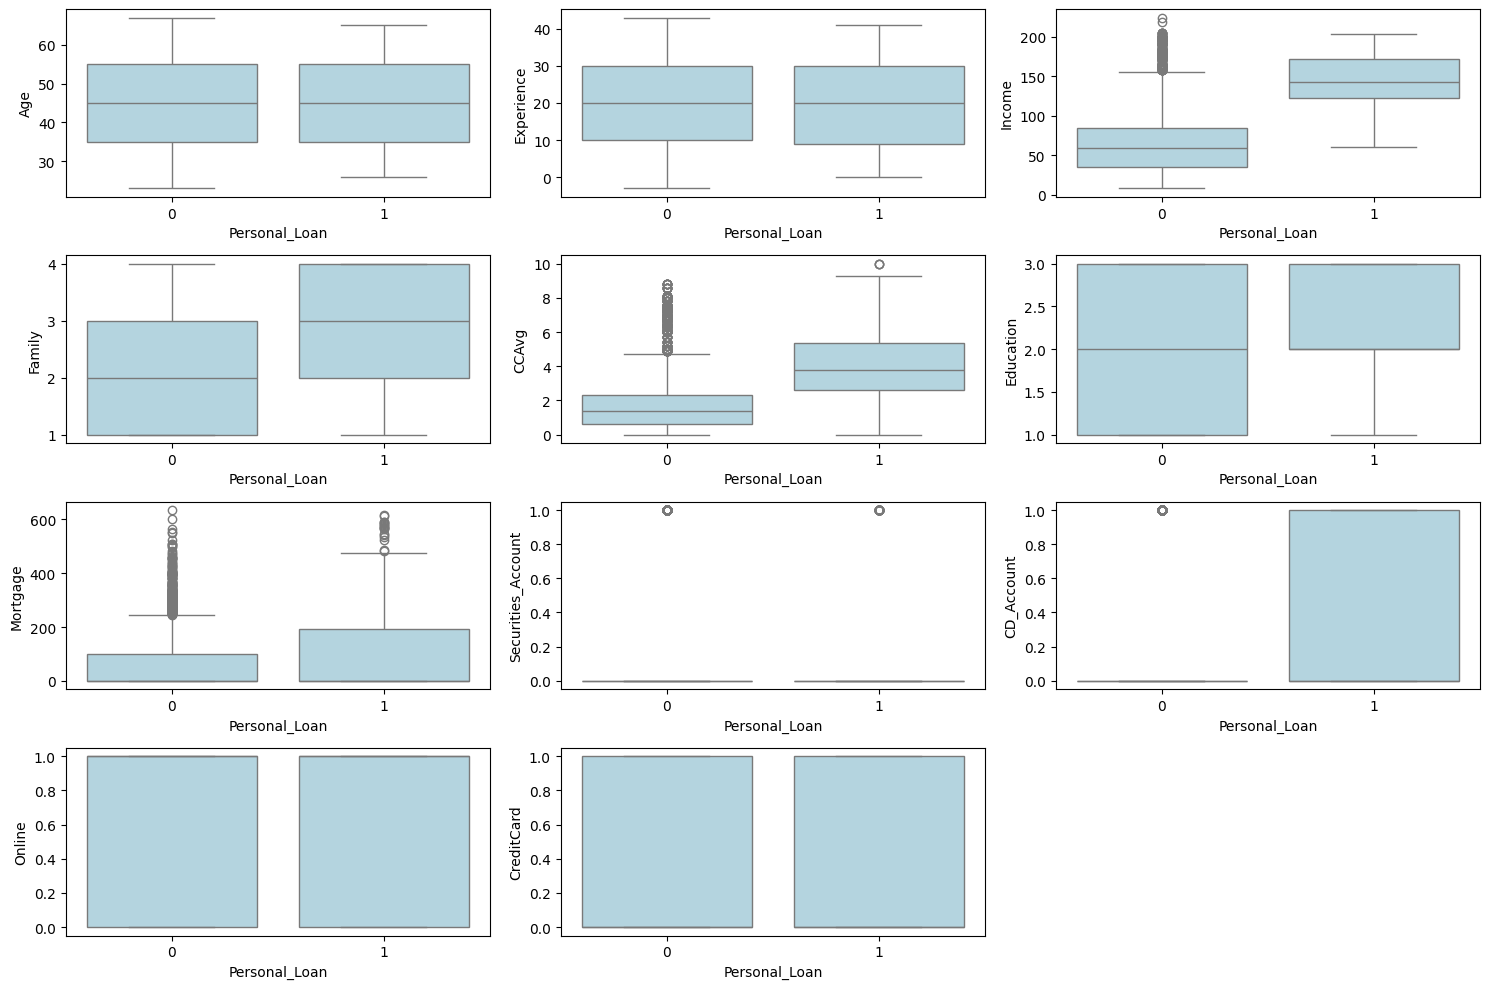

In [ ]:

obj_dataVisual.BoxPlotAnalysis()


## Count Plot
This showing more that 4000+ custmer not taken the loan
400+ Customers taken loan

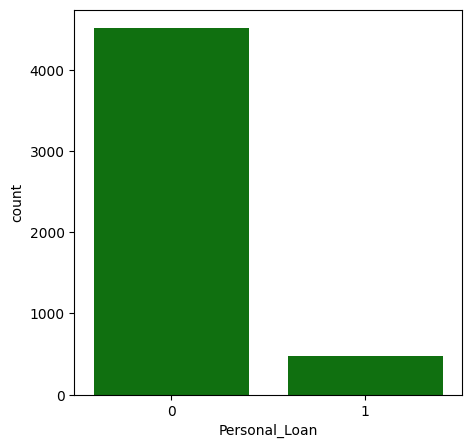

In [ ]:
obj_dataVisual.multivariate_countplot()



## Cross Tab plot
Observation
* Majority of the Customer who doesn't have Securties account, online banking and CCAvg spending less doen't taken loan
* 50% of CD holder got loan

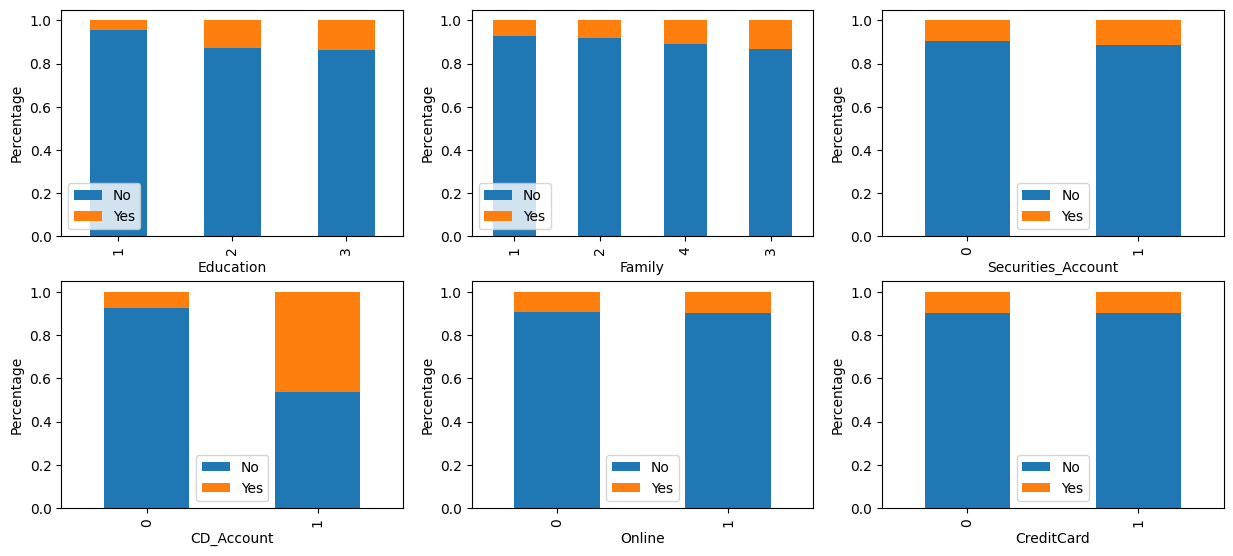

In [ ]:
obj_dataVisual.crosstab_plot()

## HeatMap Observation

Customer Income, CC Average and CD Account are strongly correlated with Personal Loan.

Person who has high salary has high CC spending nature, so they are high chances to get loan, also the customer who has certificate of deposits also taken loan

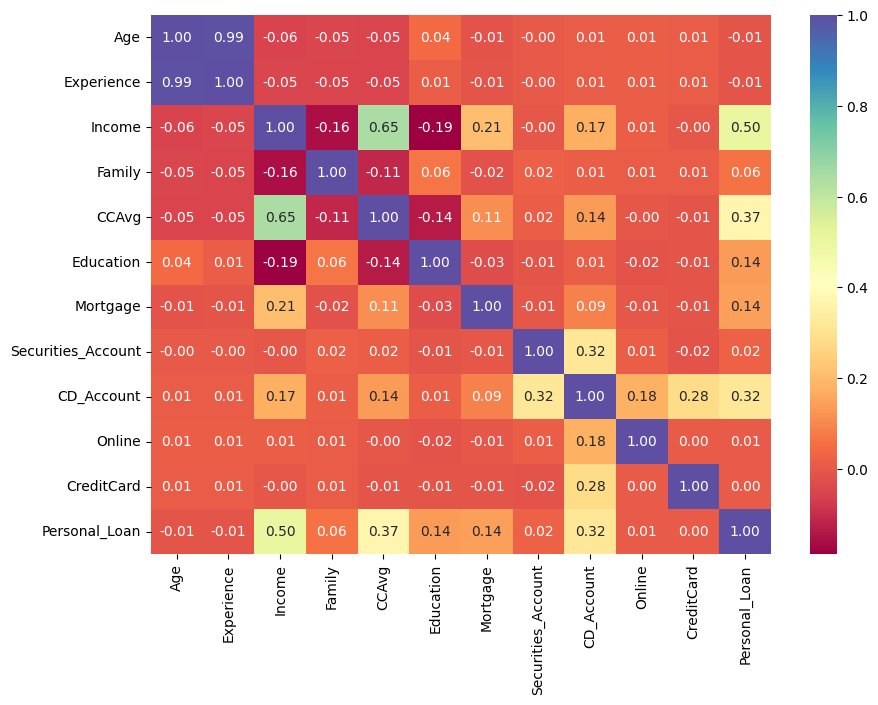

'\nIncome, CD_Account, CCAverage Highly coralated with Personal loan taken\n\n'

In [ ]:
obj_dataVisual.multivariate_HeatMap()

'''
Income, CD_Account, CCAverage Highly coralated with Personal loan taken

'''

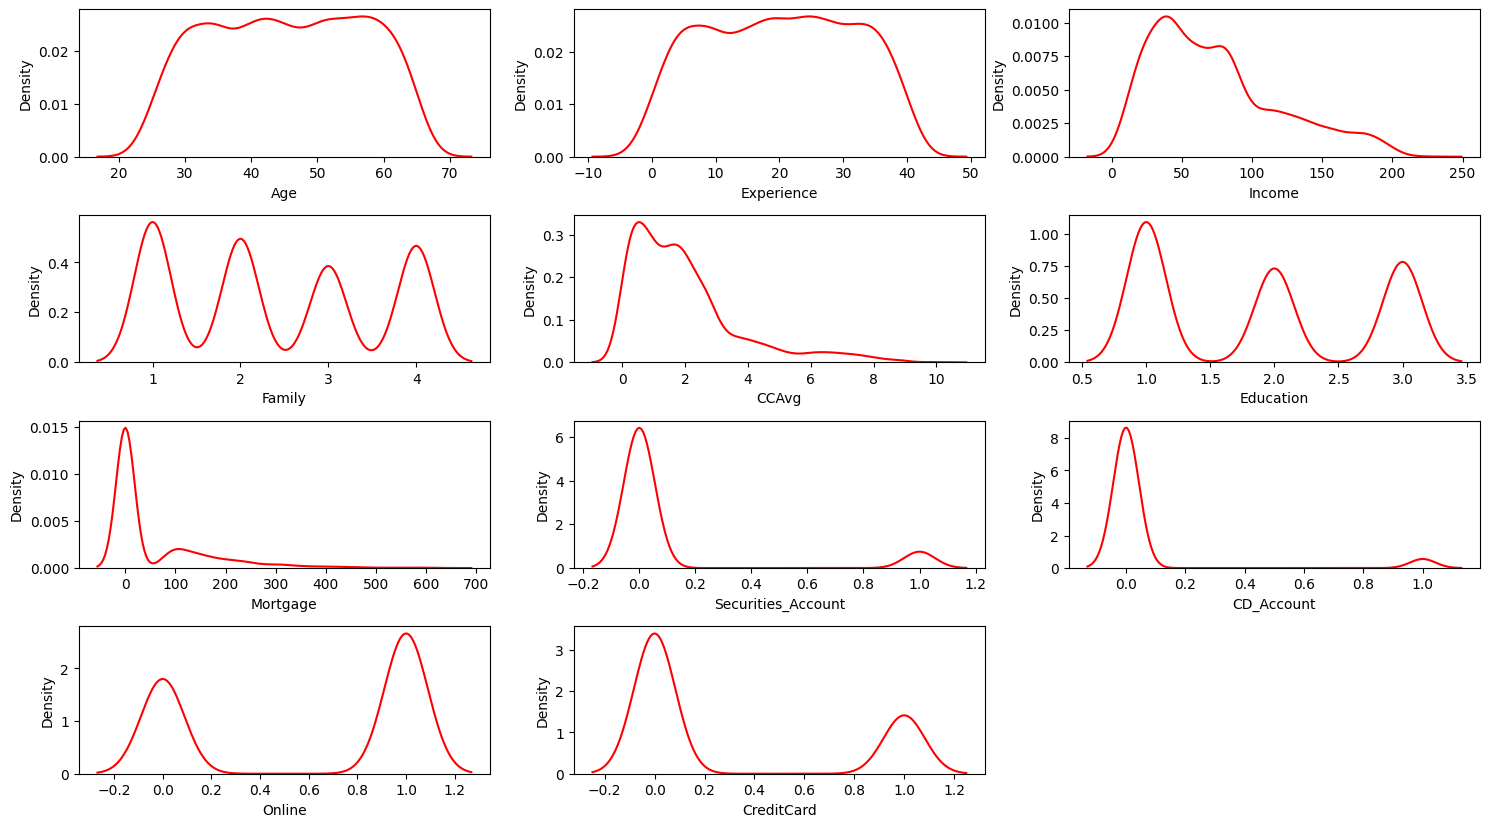

In [ ]:
obj_dataVisual.univariate_kdeploat()

In [ ]:
obj_dataVisual.mulitvariate_pairplot()

Output hidden; open in https://colab.research.google.com to view.

## Python Class: Scikit Learnin Decision Tree

In [ ]:
'''
Scikit learn Decision Tree
Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. Complete run Decision tree classifier
  5. compute the metrics(proablity basis) to get the good coverage
  6. Pre Prun using Grid search CV and Randomized search cv
  7. compute the metrics(proablity basis) to get the good coverage
  8. Post pruning finding best score ccp_alpha value and fit the model
  9. compute the metrics(proablity basis) to get the good coverage
'''

class SclitLearn_DecisionTree_Model:
  def __init__(self,df):
    print('constructor sclit learn model')
    self.df = df
    self.Feature_Test= pd.DataFrame()
    self.Feature_Train=pd.DataFrame()
    self.Target_Test=pd.DataFrame()
    self.Target_Train = pd.DataFrame()

  '''
   SPLIT THE DATASET
  '''
  def Split_Train_Test(self):
    df_Target = self.df['Personal_Loan']
    df_Features = self.df.drop(['ID','Personal_Loan'],axis =1)

    self.Feature_Test,self.Feature_Train,self.Target_Test,self.Target_Train = train_test_split(df_Features,df_Target,test_size=0.2,random_state=42,stratify=df_Target)

    print('-'*100)
    print('Feature Test data count: ',self.Feature_Test.shape[0],'rows and ',self.Feature_Test.shape[1],'columns')
    print('Feature Train data count: ',self.Feature_Train.shape[0],'rows and ',self.Feature_Train.shape[1],'columns')
    print('Target Test data count: ',self.Target_Test.shape[0],'rows')
    print('Target Train data count: ',self.Target_Train.shape[0],'rows')
    print('-'*100)

    print('Target Test Value distribution')
    print(100*self.Target_Test.value_counts(normalize=True), '\n')
    print('Target Train Value distribution')
    print(100*self.Target_Train.value_counts(normalize=True), '\n')

    print('-'*100)


  '''
  COMPLETE TREE MODEL EXEUCTION
  '''
  def Default_Tree_Model(self):
    print('Default Tree Model')

    def_tree = DecisionTreeClassifier(random_state=42)
    def_tree.fit(self.Feature_Train,self.Target_Train)
    return def_tree
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
  def Tree_GridSearchCV(self):
    print('Tree GridSearchCV')
    max_depth = [None,2,4,6,8,10]
    min_samples_split = [10,20,30,40]
    min_sample_leaf = [5,10,15,20]
    max_features = [None,'sqrt','log2']
    max_leaf_nodes = [None, 5, 10,15,20]
    criterion =['gini','entropy']
    param_grid = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_sample_leaf,'max_features':max_features,
                  'max_leaf_nodes':max_leaf_nodes,'criterion':criterion}

    dec_tree = DecisionTreeClassifier(random_state = 42)
    grid_search = GridSearchCV(estimator = dec_tree, param_grid = param_grid,cv=5)
    return grid_search.fit(self.Feature_Train,self.Target_Train)
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#

  '''
  PRE PRUNE TUNING THE MODEL USING RANDOMIZED SEARCH CV
  '''
  def Tree_RandomizedSearchCV(self):
    print('Tree Randomized Search CV')
    max_depth = [None,10,20,30,40,50]
    min_samples_split = randint(2,30)
    min_sample_leaf = randint(1,20)
    max_features = [None,'sqrt','log2']
    max_leaf_nodes = [None,10,20,30,40,50]
    criterion =['gini','entropy']
    param_dist = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_sample_leaf,'max_features':max_features,
                  'max_leaf_nodes':max_leaf_nodes,'criterion':criterion}

    dec_tree = DecisionTreeClassifier(random_state = 42)
    random_search = RandomizedSearchCV(estimator = dec_tree, param_distributions = param_dist,cv=5,n_iter=100)
    return random_search.fit(self.Feature_Train,self.Target_Train)
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#

  '''
  POST PRUNING THE TREE
  '''
  def Tree_Post_Pruning(self):
    print('Tree cost post pruning')

    ##FULL TREE MODEL
    Full_Tree = DecisionTreeClassifier(random_state=42)
    Full_Tree.fit(self.Feature_Train,self.Target_Train)


    # PRUNING PATH COMPUTATION
    post_prunning_path = Full_Tree.cost_complexity_pruning_path(self.Feature_Train,self.Target_Train)
    ccp_alpha,impurities = post_prunning_path.ccp_alphas , post_prunning_path.impurities
    print('ccp_alpha value for full trained tree: ',ccp_alpha)
    print('impurities value for full trained tree: ',impurities)

    ## FOR EACH ALPHA VALUE PRUNNING THE TREE AND STORING ACCURACY
    tree_prune =[]
    for ccp_al in ccp_alpha:
      tree_prune_alpha = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_al)
      tree_prune_alpha.fit(self.Feature_Train,self.Target_Train)
      tree_prune.append(tree_prune_alpha)

    ## Evaluate the pruned based on alpha accuracy
    train_score_alpha_prune = [accuracy_score(self.Target_Train, tree_indx.predict(self.Feature_Train)) for tree_indx in tree_prune]
    test_score_alpha_prune = [accuracy_score(self.Target_Test, tree_indx.predict(self.Feature_Test)) for tree_indx in tree_prune]

    ## BASED ON THE TEST ACCURACY FINDING THE BEST TREE
    max_score_index = np.argmax(test_score_alpha_prune)
    best_fit_ccp_alpha = ccp_alpha[max_score_index]

    ## TRAIN THE TREE FOR BEST FIT CCP ALPHA
    best_fit_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_fit_ccp_alpha)
    best_fit_tree.fit(self.Feature_Train,self.Target_Train)

    return best_fit_tree



#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
  '''
  METRICS CALCULATION
  '''

  def Metrics_Calculation(self,treeModel,algorithm_type,package_type,):
    print('Metrics Calculation')
    outcome_Prediction_Test = treeModel.predict(self.Feature_Test)
    df_outcome_Pred_Test = pd.DataFrame({'Actual':self.Target_Test, 'Predicated_Ourcomes':outcome_Prediction_Test})

    Test_accuracy = accuracy_score(self.Target_Test,outcome_Prediction_Test)
    Test_recall = recall_score(self.Target_Test,outcome_Prediction_Test)
    Test_Precision = precision_score(self.Target_Test,outcome_Prediction_Test)
    Test_f1_score = f1_score(self.Target_Test,outcome_Prediction_Test)
    Test_confusion_matrix = confusion_matrix(self.Target_Test,outcome_Prediction_Test)
    df_Test_Metrics = pd.DataFrame({'Algorithm':[algorithm_type],'Package Type':[package_type],'Sample Type':['Test_dataset'],'Accuracy':[Test_accuracy],
                                    'Recall':[Test_recall], 'Precision':[Test_Precision], 'F1-Score':[Test_f1_score]})

    print('-'*100)
    outcome_Prediction_Train = treeModel.predict(self.Feature_Train)

    Train_accuracy = accuracy_score(self.Target_Train,outcome_Prediction_Train)
    Train_recall = recall_score(self.Target_Train, outcome_Prediction_Train)
    Train_Precision = precision_score(self.Target_Train, outcome_Prediction_Train)
    Train_f1_score = f1_score(self.Target_Train, outcome_Prediction_Train)
    Train_confusion_matrix = confusion_matrix(self.Target_Train, outcome_Prediction_Train)
    print(Test_confusion_matrix)

    df_Train_Metrics = pd.DataFrame({'Algorithm':[algorithm_type],'Package Type':[package_type],'Sample Type':['Train_dataset'],'Accuracy':[Train_accuracy],
                                     'Recall':[Train_recall],'Precision':[Train_Precision],'F1-Score':[Train_f1_score]})




    print('-'*100)

    cm_test_label = np.asarray([["{0:0.0f}".format(item)+"\n{0:.2}".format(item/Test_confusion_matrix.flatten().sum())]
                                for item in Test_confusion_matrix.flatten()]).reshape(2,2)

    cm_train_label = np.asarray([["{0:0.0f}".format(item)+"\n{0:.2}".format(item/Train_confusion_matrix.flatten().sum())]
                                for item in Train_confusion_matrix.flatten()]).reshape(2,2)

    plt.figure(figsize=(3,3))
    sns.heatmap(Test_confusion_matrix,annot=cm_test_label,cmap='Spectral',fmt='')
    plt.ylabel('Acutal')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix for Test ')
    plt.show()

    plt.figure(figsize=(3,3))
    sns.heatmap(Train_confusion_matrix,annot=cm_train_label,cmap='Spectral',fmt='')
    plt.ylabel('Acutal')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix for Train')
    plt.show()


    return df_Test_Metrics,df_Train_Metrics

#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#

  '''
  TO PRINT THE TREE
  '''

  def Print_The_Tree(self,tree_model):
    feature_columns = list(self.Feature_Train.columns)
    plt.figure(figsize=(5,3))
    tree_img=tree.plot_tree(tree_model,feature_names=feature_columns,class_names=None,filled=True,fontsize=5,node_ids=False)
    for nde in tree_img:
      arw = nde.arrow_patch
      if arw is not None:
        arw.set_edgecolor('black')
        arw.set_linewidth(1.5)
        arw.set_linestyle('--')
    plt.show()

    print(tree.export_text(tree_model,feature_names=feature_columns,show_weights=True))

#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#






constructor sclit learn model
----------------------------------------------------------------------------------------------------
Feature Test data count:  4000 rows and  12 columns
Feature Train data count:  1000 rows and  12 columns
Target Test data count:  4000 rows
Target Train data count:  1000 rows
----------------------------------------------------------------------------------------------------
Target Test Value distribution
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Target Train Value distribution
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

----------------------------------------------------------------------------------------------------
Default Tree Model


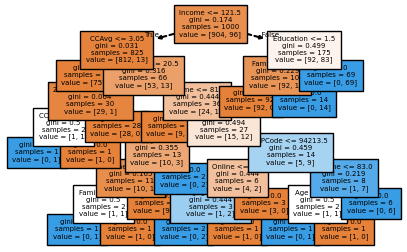

|--- Income <= 121.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [759.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- Experience <= 20.50
|   |   |   |--- ZIPCode <= 90056.50
|   |   |   |   |--- CCAvg <= 4.30
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- CCAvg >  4.30
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- ZIPCode >  90056.50
|   |   |   |   |--- weights: [28.00, 0.00] class: 0
|   |   |--- Experience >  20.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- Income <= 88.00
|   |   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Income >

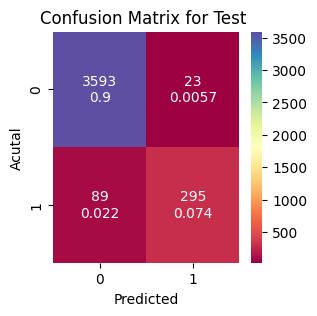

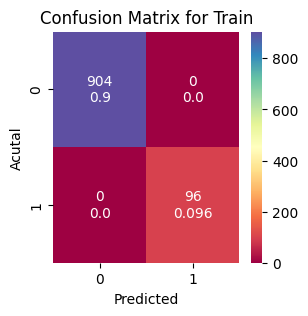

In [ ]:
'''
INVOKIN THE CLASS FOR SCIKIT LEARN DECISION TREE
COMPLETE TREE MODEL
AND
METRICS CALCULATION
'''

Objsklearn = SclitLearn_DecisionTree_Model(df_LoanModelling)
Objsklearn.Split_Train_Test()
def_Tree_Model = Objsklearn.Default_Tree_Model()
Objsklearn.Print_The_Tree(def_Tree_Model)
def_Test_Metrics,def_Train_Metrics = Objsklearn.Metrics_Calculation(def_Tree_Model,"Complete Tree",'Scikit learn')
def_Test_Metrics,def_Train_Metrics

Overall_Test_Metrics = pd.concat([def_Test_Metrics],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([def_Train_Metrics],axis=0,ignore_index=True)

Tree GridSearchCV
Best Estimator: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)
Best Parameter: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best Score: 0.9879999999999999


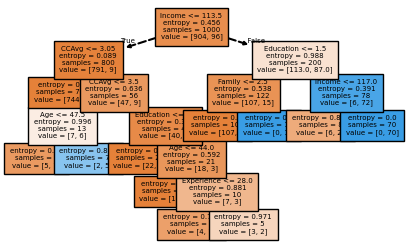

|--- Income <= 113.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [744.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- CCAvg <= 3.50
|   |   |   |--- Age <= 47.50
|   |   |   |   |--- weights: [5.00, 1.00] class: 0
|   |   |   |--- Age >  47.50
|   |   |   |   |--- weights: [2.00, 5.00] class: 1
|   |   |--- CCAvg >  3.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Age <= 44.00
|   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |--- Age >  44.00
|   |   |   |   |   |--- Experience <= 28.00
|   |   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |   |   |   |--- Experience >  28.00
|   |   |   |   |   |   |--- weights: [3.00, 2.00] class: 0
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [107.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 15.00] class: 1
|   |-

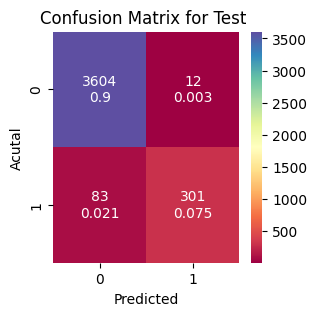

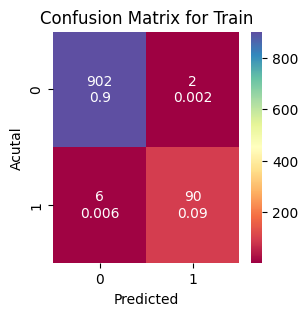

In [ ]:
'''
PRE PRUNING
GRID SEARCH CV MODEL AND METRICS CALCULATON
'''

grid_search_model=Objsklearn.Tree_GridSearchCV()
print("Best Estimator:",grid_search_model.best_estimator_)
print("Best Parameter:",grid_search_model.best_params_)
print("Best Score:", grid_search_model.best_score_)
Objsklearn.Print_The_Tree(grid_search_model.best_estimator_)
grid_Test_Metrics,grid_Train_Metrics = Objsklearn.Metrics_Calculation(grid_search_model,"Pre pruning Grid Search",'Scikit Learn')
grid_Test_Metrics,grid_Train_Metrics

Overall_Test_Metrics = pd.concat([Overall_Test_Metrics,grid_Test_Metrics],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([Overall_Train_Metrics,grid_Train_Metrics],axis=0,ignore_index=True)

Tree Randomized Search CV


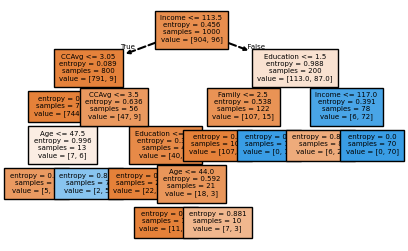

|--- Income <= 113.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [744.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- CCAvg <= 3.50
|   |   |   |--- Age <= 47.50
|   |   |   |   |--- weights: [5.00, 1.00] class: 0
|   |   |   |--- Age >  47.50
|   |   |   |   |--- weights: [2.00, 5.00] class: 1
|   |   |--- CCAvg >  3.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Age <= 44.00
|   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |--- Age >  44.00
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [107.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 15.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 117.00
|   |   |   |--- weights: [6.00, 2.00] class: 0
|   |   |--- Income >  117.00
|   |   |   |--- weights:

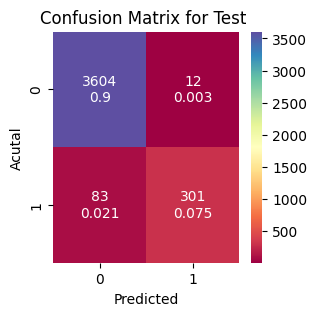

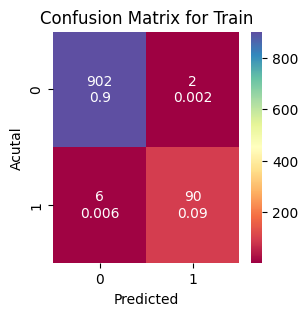

In [ ]:
'''
PRE PRUNING
RANDOMIZED SEARCH CV MODEL AND METRICS CALCULATON
'''

random_search_model=Objsklearn.Tree_RandomizedSearchCV()
Objsklearn.Print_The_Tree(random_search_model.best_estimator_)
print("Best Estimator:",random_search_model.best_estimator_)
print("Best Parameter:",random_search_model.best_params_)
print("Best Score:", random_search_model.best_score_)
rndm_Test_Metrics,rndm_Train_Metrics = Objsklearn.Metrics_Calculation(random_search_model,'Pre Pruning Randomized Search CV','Scikit learn')
rndm_Test_Metrics,rndm_Train_Metrics

Overall_Test_Metrics = pd.concat([Overall_Test_Metrics,rndm_Test_Metrics],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([Overall_Train_Metrics,rndm_Train_Metrics],axis=0,ignore_index=True)

Tree cost post pruning
ccp_alpha value for full trained tree:  [0.         0.000875   0.00090909 0.00096667 0.00133333 0.0020119
 0.00254329 0.00266667 0.00294545 0.00471152 0.02430189 0.06183791]
impurities value for full trained tree:  [0.         0.00175    0.00356818 0.00550152 0.00816818 0.01018009
 0.01526667 0.01793333 0.02087879 0.0255903  0.04989219 0.173568  ]


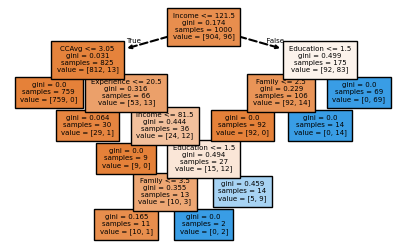

|--- Income <= 121.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [759.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- Experience <= 20.50
|   |   |   |--- weights: [29.00, 1.00] class: 0
|   |   |--- Experience >  20.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 9.00] class: 1
|--- Income >  121.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [92.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 14.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 69.00] class: 1

Important Feature [0.         0.01802737 0

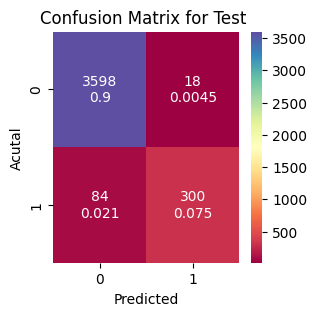

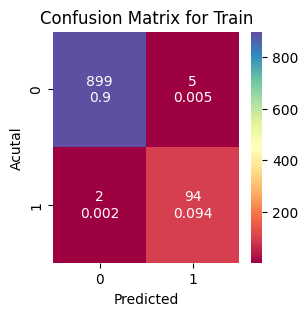

In [ ]:
'''
POST PRUNING THE TREE AND METRICS CALCULATION
'''

post_prune_tree = Objsklearn.Tree_Post_Pruning()
Objsklearn.Print_The_Tree(post_prune_tree)
print('Important Feature',post_prune_tree.feature_importances_)

pstprun_Test_Metrics, pstprun_Train_Metrics = Objsklearn.Metrics_Calculation(post_prune_tree,'Post Pruning','Scikit learn')
pstprun_Test_Metrics, pstprun_Train_Metrics

Overall_Test_Metrics = pd.concat([Overall_Test_Metrics,pstprun_Test_Metrics],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([Overall_Train_Metrics,pstprun_Train_Metrics],axis=0,ignore_index=True)

In [ ]:
'''
METRICS MERGE SKLEARN DECISION TREE
'''

Sk_decisionTree_Test_Metrics = pd.concat([def_Test_Metrics, grid_Test_Metrics, rndm_Test_Metrics, pstprun_Test_Metrics],axis=0)
Sk_decisionTree_Train_Metrics = pd.concat([def_Train_Metrics, grid_Train_Metrics, rndm_Train_Metrics, pstprun_Train_Metrics],axis=0)

# Overall_Test_Metrics.columns=['Default Tree','Grid Search CV','Randomized Search CV','Post Pruning']
# Overall_Train_Metrics.columns=['Default Tree','Grid Search CV','Randomized Search CV','Post Pruning']
Sk_decisionTree_Test_Metrics


,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Complete Tree,Scikit learn,Test_dataset,0.97200,0.768229,0.927673,0.840456
0,Pre pruning Grid Search,Scikit Learn,Test_dataset,0.97625,0.783854,0.961661,0.863702
0,Pre Pruning Randomized Search CV,Scikit learn,Test_dataset,0.97625,0.783854,0.961661,0.863702
0,Post Pruning,Scikit learn,Test_dataset,0.97450,0.781250,0.943396,0.854701


In [ ]:
Sk_decisionTree_Train_Metrics

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Complete Tree,Scikit learn,Train_dataset,1.000,1.000000,1.000000,1.000000
0,Pre pruning Grid Search,Scikit Learn,Train_dataset,0.992,0.937500,0.978261,0.957447
0,Pre Pruning Randomized Search CV,Scikit learn,Train_dataset,0.992,0.937500,0.978261,0.957447
0,Post Pruning,Scikit learn,Train_dataset,0.993,0.979167,0.949495,0.964103


## TENSORFLOW DECISION TREE - FINAL

----------------------------------------------------------------------------------------------------
Feature data count before split: 5000 rows and  11 columns
Target data count before split: 5000
----------------------------------------------------------------------------------------------------
After Split the dataset
Feature Train: 4000 rows and  11  columns
Feature Test: 1000  rows and  11  columns
Target Train: 4000 rows
Target Test: 1000 rows
----------------------------------------------------------------------------------------------------
After SMOTE Resample
Attribute Train:  7232 rows and  11 columns
Target Train:  7232 rows
----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       904
           1       0.83      0.95      0.89        96

    accuracy                           0.98      1000
   macro avg 

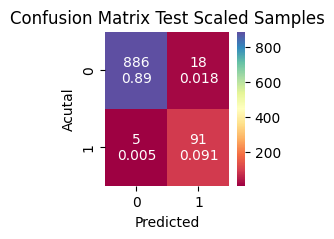

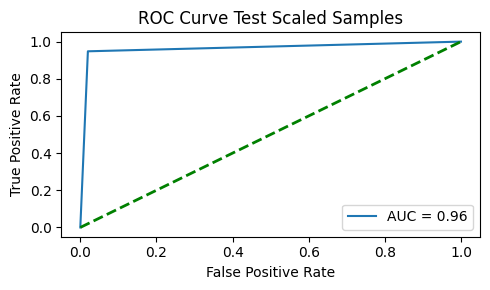

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



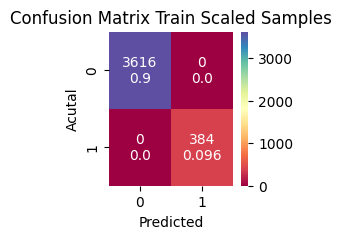

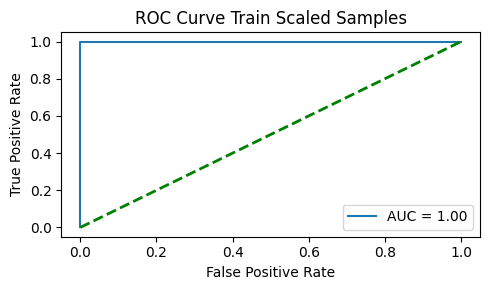

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       904
           1       0.84      0.94      0.89        96

    accuracy                           0.98      1000
   macro avg       0.92      0.96      0.94      1000
weighted avg       0.98      0.98      0.98      1000



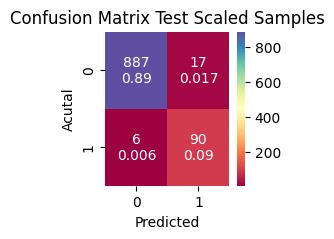

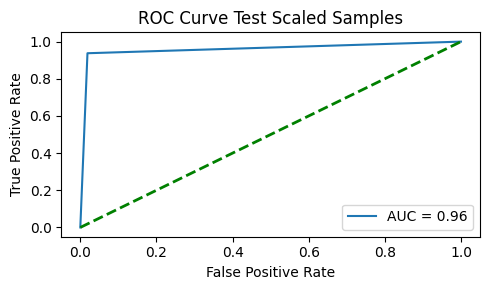

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3616
           1       0.86      0.94      0.90       384

    accuracy                           0.98      4000
   macro avg       0.93      0.96      0.94      4000
weighted avg       0.98      0.98      0.98      4000



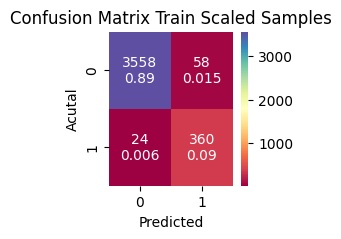

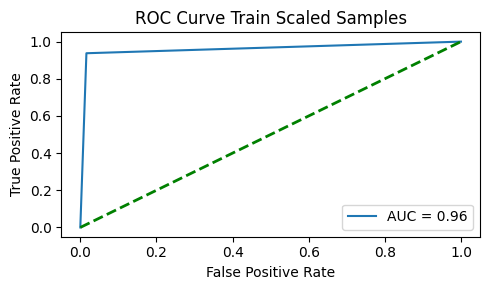

[0.00000000e+00 9.03016074e-05 1.18520860e-04 1.18520860e-04
 1.28397598e-04 1.29056047e-04 1.31989139e-04 1.32262409e-04
 1.34019741e-04 1.34207444e-04 1.34897048e-04 1.36818817e-04
 1.84228452e-04 1.85037264e-04 2.08646097e-04 2.21238938e-04
 2.21238938e-04 2.42481082e-04 2.48893805e-04 2.50210704e-04
 2.55275698e-04 2.55275698e-04 2.55855870e-04 2.58112094e-04
 2.65703627e-04 2.68414888e-04 2.75526483e-04 2.76548673e-04
 2.77207568e-04 2.92283921e-04 3.16055626e-04 3.40367597e-04
 3.42094300e-04 3.46306407e-04 3.62586037e-04 3.79266751e-04
 3.93313668e-04 4.06550185e-04 4.07481009e-04 4.44453224e-04
 4.79351032e-04 5.78654590e-04 6.24674649e-04 7.03035639e-04
 7.14058944e-04 7.63638105e-04 8.50762251e-04 9.21285172e-04
 1.07748345e-03 1.35508850e-03 1.61152346e-03 1.98311200e-03
 2.31070208e-03 2.38548362e-03 2.63170508e-03 8.81298678e-03
 1.34199626e-02 5.24646192e-02 6.84615776e-02 3.04963255e-01]
------------------------------------------------------------------------------------

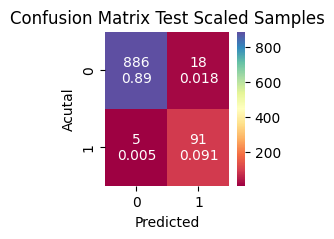

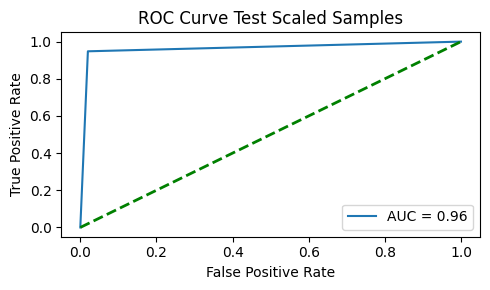

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



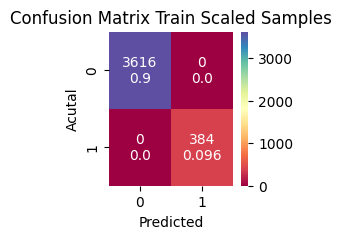

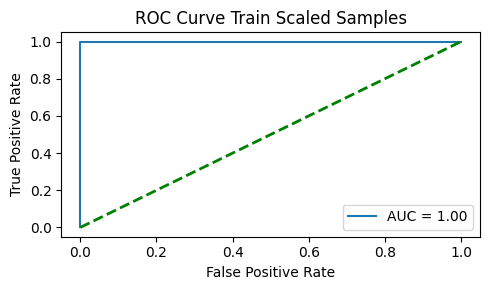

In [ ]:
'''
TENSORFLOW DECISION TREE MODEL EXECUTION

Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. Complete run Decision tree classifier
  5. compute the metrics(proablity basis) to get the good coverage
  6. Pre Prun the model by hyper tuning parameters
  7. compute the metrics(proablity basis) to get the good coverage
  8. Post pruning finding best score ccp_alpha value and fit the model
  9. compute the metrics(proablity basis) to get the good coverage


'''


class Tesnorflow_DecisionTree(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)

  def TensorFlow_DecisionTreeModel(self):
    Feature_Train,Feature_Test,Target_Train,Target_Test = self.Split_Train_Test() # SPLIT THE DATASET
    Feature_Train_Scaled, Feature_Test_Scaled = self.Scaler_Transform(Feature_Train,Feature_Test) # SCALAR TRANSFORMATION
    Feature_Train_resample, Target_Train_resample =self.SMOTE_Resample(Feature_Train_Scaled,Target_Train) # DATASET BALANCE USING SMOTE RESAMPLE

    ## COMPLETE TREE
    model_decision_Tree = DecisionTreeClassifier(random_state = 42)
    model_decision_Tree.fit(Feature_Train_resample,Target_Train_resample)

    #TEST DATASET PREDICTION AND METRICS
    comTree_Pred_Prob_Test = model_decision_Tree.predict_proba(Feature_Test_Scaled)[:,1]
    compTree_Pred_Test_Scaled = (comTree_Pred_Prob_Test >0.5).astype(int)

    #TRAIN DATASET PREDICTION AND METRICS
    comTree_Pred_Prob_Train = model_decision_Tree.predict_proba(Feature_Train_Scaled)[:,1]
    compTree_Pred_Train_Scaled = (comTree_Pred_Prob_Train >0.5).astype(int)


    df_Test_Metrics_CompTree = self.Calculating_Metrics(Target_Test,compTree_Pred_Test_Scaled,'Test Scaled Samples','Decision Tree','Tensorflow')
    df_Train_Metric_compTree = self.Calculating_Metrics(Target_Train,compTree_Pred_Train_Scaled,'Train Scaled Samples','Decision Tree','Tensorflow')



    # PRE PRUNING
    pre_prune_model = DecisionTreeClassifier(random_state = 42, max_depth = 4, min_samples_split=5, min_samples_leaf=3,criterion='gini')
    pre_prune_model.fit(Feature_Train_resample,Target_Train_resample)

    # TEST AND TRAIN DATASET PREDICTION RUN AND METRICS CALCULATION
    pre_prune_Pred_Prob_Test = pre_prune_model.predict_proba(Feature_Test_Scaled)[:,1]
    pre_prune_Pred_Test_Scaled = (pre_prune_Pred_Prob_Test >0.5).astype(int)
    pre_prune_Pred_Prob_Train = pre_prune_model.predict_proba(Feature_Train_Scaled)[:,1]
    pre_prune_Pred_Train_Scaled = (pre_prune_Pred_Prob_Train >0.5).astype(int)

    df_Test_Metrics_PrePrune = self.Calculating_Metrics(Target_Test,pre_prune_Pred_Test_Scaled,'Test Scaled Samples','Pre Prune Decision Tree','Tensorflow')
    df_Train_Metric_PrePrune = self.Calculating_Metrics(Target_Train,pre_prune_Pred_Train_Scaled,'Train Scaled Samples','Pre Prune Decision Tree','Tensorflow')


    # POST PRUNE
    post_prune_model = DecisionTreeClassifier(random_state = 42) # COMPLETE TREE RUN
    #CALCULATE THE COST COMPLEXITY
    cost_complexity_pruning = post_prune_model.cost_complexity_pruning_path(Feature_Train_resample,Target_Train_resample)
    ccp_alpha = cost_complexity_pruning.ccp_alphas #GET THE LIST OF CCP_APLPHAS VALUES
    print(ccp_alpha)
    post_prune_model_alpha = []
    #RUN THE MODEL TO GET THE BEST CCP_ALPHAS VALUE
    for ccp in ccp_alpha:
      alpha_model = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp)
      alpha_score = cross_val_score(alpha_model,Feature_Train_resample,Target_Train_resample,cv=5)
      post_prune_model_alpha.append(alpha_score.mean())

    # TO GET THE BEST ALPHA VALUE
    best_alpha = ccp_alpha[np.argmax(post_prune_model_alpha)]
    post_prune_model = DecisionTreeClassifier(random_state = 42, ccp_alpha=best_alpha)
    post_prune_model.fit(Feature_Train_resample,Target_Train_resample)

    # TEST AND TRAIN DATASET PREDICTION RUN AND METRICS CALCULATION
    post_prune_Pred_Prob_Test = post_prune_model.predict_proba(Feature_Test_Scaled)[:,1]
    post_prune_Pred_Test_Scaled = (post_prune_Pred_Prob_Test >0.5).astype(int)
    post_prune_Pred_Prob_Train = post_prune_model.predict_proba(Feature_Train_Scaled)[:,1]
    post_prune_Pred_Train_Scaled = (post_prune_Pred_Prob_Train >0.5).astype(int)
    df_Test_Metrics_PostPrune = self.Calculating_Metrics(Target_Test,post_prune_Pred_Test_Scaled,'Test Scaled Samples','Post Prune Decision Tree','Tensorflow')
    df_Train_Metrics_PostPrune = self.Calculating_Metrics(Target_Train,post_prune_Pred_Train_Scaled,'Train Scaled Samples','Post Prune Decision Tree','Tensorflow')



    df_Test_Metrics = pd.concat([df_Test_Metrics_CompTree,df_Test_Metrics_PrePrune,df_Test_Metrics_PostPrune],axis=0)
    df_Train_Metrics = pd.concat([df_Train_Metric_compTree,df_Train_Metric_PrePrune,df_Train_Metrics_PostPrune],axis=0)

    df_Test_Metrics.columns=['Algorithm','Package Type','Sample Type','Accuracy','Recall','Precision','F1-Score']
    df_Train_Metrics.columns=['Algorithm','Package Type','Sample Type','Accuracy','Recall','Precision','F1-Score']


    return df_Test_Metrics,df_Train_Metrics






Tf_DecisionTree = Tesnorflow_DecisionTree(df_LoanModelling)
Test_Metrics_dTree,Train_Metrics_dTree = Tf_DecisionTree.TensorFlow_DecisionTreeModel()

Overall_Test_Metrics = pd.concat([Overall_Test_Metrics,Test_Metrics_dTree],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([Overall_Train_Metrics,Train_Metrics_dTree],axis=0,ignore_index=True)

In [ ]:
Test_Metrics_dTree

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Decision Tree,Tensorflow,Test Scaled Samples,0.977,0.834862,0.947917,0.887805
0,Pre Prune Decision Tree,Tensorflow,Test Scaled Samples,0.977,0.841121,0.937500,0.886700
0,Post Prune Decision Tree,Tensorflow,Test Scaled Samples,0.977,0.834862,0.947917,0.887805


In [ ]:
Train_Metrics_dTree

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Decision Tree,Tensorflow,Train Scaled Samples,1.0000,1.000000,1.0000,1.000000
0,Pre Prune Decision Tree,Tensorflow,Train Scaled Samples,0.9795,0.861244,0.9375,0.897756
0,Post Prune Decision Tree,Tensorflow,Train Scaled Samples,1.0000,1.000000,1.0000,1.000000


## SK LEARN LOGISTIC REGRESSION

----------------------------------------------------------------------------------------------------
Feature data count before split: 5000 rows and  11 columns
Target data count before split: 5000
----------------------------------------------------------------------------------------------------
After Split the dataset
Feature Train: 4000 rows and  11  columns
Feature Test: 1000  rows and  11  columns
Target Train: 4000 rows
Target Test: 1000 rows
----------------------------------------------------------------------------------------------------
After SMOTE Resample
Attribute Train:  7232 rows and  11 columns
Target Train:  7232 rows
              Features         VIF
0                const    1.408297
1                  Age  105.913378
2           Experience  106.000692
3               Income    1.893500
4               Family    1.017705
5                CCAvg    1.718526
6            Education    1.058197
7             Mortgage    1.077403
8   Securities_Account    1.304574
9     

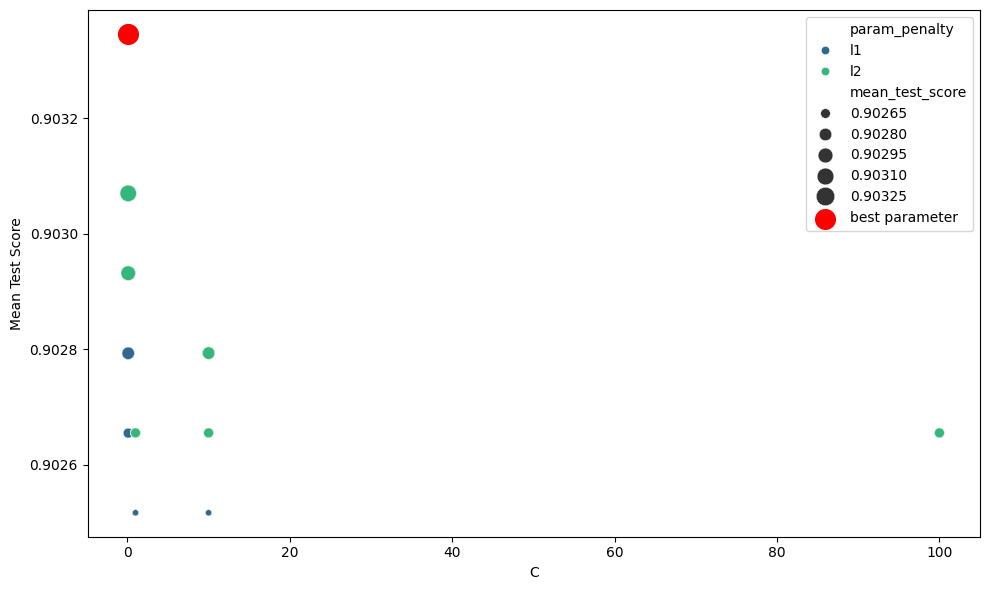

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       904
           1       0.50      0.92      0.65        96

    accuracy                           0.90      1000
   macro avg       0.75      0.91      0.80      1000
weighted avg       0.94      0.90      0.92      1000



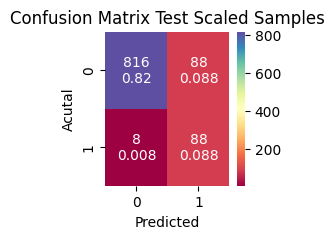

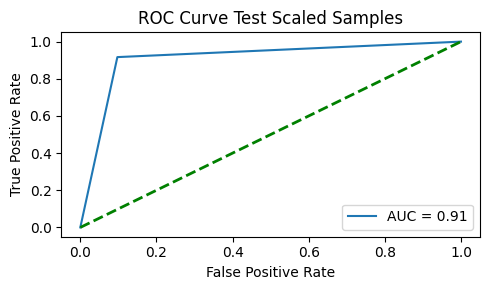

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3616
           1       0.47      0.89      0.62       384

    accuracy                           0.89      4000
   macro avg       0.73      0.89      0.78      4000
weighted avg       0.94      0.89      0.91      4000



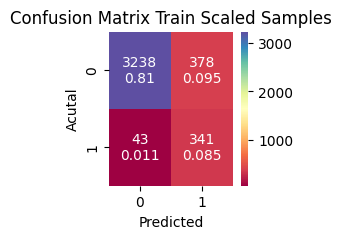

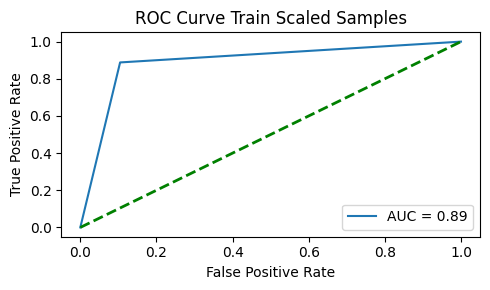

In [ ]:
'''
SK LEARN LOGISTIC REGRESSION
Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. SK LEARN Logistic regression
  5. Compute the Metrics
  6. find VIF(high multicolinearity) feature which might impact the perfromance VIF>10 high impact VIF >5 moderate impact
  7. drop high VIF feature
  8. HYPER TUNING THE MODEL USING GRID SEARCH CV
      hyper tuning parameter:
      * c(Regluarization Stringth): [0.01,0.1,1,10,100]: Controls the inverse regularization strength(Prevent Overfiting), smaller c values --> stronger regularozation
      * penalty: [l1, l2] l1- laso & l2 ridge
      * solver: [liblinear,saga] Optimizer alogrithm libilinear- library for large linear classification; saga: schotistic average gradient decscent
      * max_iter:[100,200,300] maximum number of iteration taken algorithm to converge
      * class weight:[balanced,dict,list]: balanced: automatically adjust weights inversely proptional to weight
      * tol : tolerance for stopping criteria

  9. compute the metrics(proablity basis) to get the good coverage
'''


class skLearn_Logistic_Model(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)

  def sklearn_Logistic(self):


    Feature_Train,Feature_Test,Target_Train,Target_Test = self.Split_Train_Test() #DATASET SPLIT

    Feature_Train_Scaled, Feature_Test_Scaled = self.Scaler_Transform(Feature_Train,Feature_Test) # DATASET SCALAR TRANSFORMATION
    df_Feature_Train_Scaled = pd.DataFrame(Feature_Train_Scaled,columns=Feature_Train.columns)
    df_Feature_Test_Scaled = pd.DataFrame(Feature_Test_Scaled,columns=Feature_Test.columns)

    Feature_Train_resample, Target_Train_resample =self.SMOTE_Resample(df_Feature_Train_Scaled,Target_Train) # SMOTE RESAMPLING TO BALANCE THE FEATURE AND TARGET

    # Variable Influence Factor Calculation
    # TO CALCULATE THE VARIABLE INFLUENCE FACTOR WHICH CAUSING MULTICOLINEARITY
    Feature_Train_resample = sm.add_constant(Feature_Train_resample)
    VIF_df = pd.DataFrame()
    VIF_df['Features'] = Feature_Train_resample.columns
    VIF_df['VIF'] = [variance_inflation_factor(Feature_Train_resample.values,i) for i in range(Feature_Train_resample.shape[1])]
    print(VIF_df)

    # REMOVING THE COLUMNS WHICH CAUSING HIGH VIF
    Feature_Train_resample = Feature_Train_resample.drop(['const','Experience'],axis=1)
    df_Feature_Test_Scaled = df_Feature_Test_Scaled.drop(['Experience'],axis=1)
    df_Feature_Train_Scaled = df_Feature_Train_Scaled.drop(['Experience'],axis=1)

    VIF_df = pd.DataFrame()
    VIF_df['Features'] = Feature_Train_resample.columns
    VIF_df['VIF After removing column'] = [variance_inflation_factor(Feature_Train_resample.values,i) for i in range(Feature_Train_resample.shape[1])]
    print(VIF_df)


    # HYPER TUNING PARAMETER
    parameter_grid_value = {'C':[0.1,1,10,100],'penalty':['l1','l2'],'solver':['libilinear','saga'],'max_iter':[100,200,300],
                            'class_weight':['balanced',None], 'random_state':[42],'tol':[1e-4, 1e-3, 1e-2]}

    hyper_Grid = GridSearchCV(LogisticRegression(),parameter_grid_value,cv=5,verbose=1,n_jobs=-1,scoring ='accuracy')
    hyper_Grid.fit(Feature_Train_resample,Target_Train_resample)

    best_model = hyper_Grid.best_estimator_
    best_parameter = hyper_Grid.best_params_
    best_score = hyper_Grid.best_score_
    tune_cv_result = hyper_Grid.cv_results_
    best_index = hyper_Grid.best_index_
    df_tune_cv = pd.DataFrame(tune_cv_result)

    print('Best Parameter:',best_parameter)
    print('Best Score:',best_score)

    # ploting the best param
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df_tune_cv['param_C'],y=df_tune_cv['mean_test_score'],hue=df_tune_cv['param_penalty'].astype(str),
                    size = df_tune_cv['mean_test_score'],sizes=(20,200), palette ='viridis',legend='auto')
    plt.scatter(x = df_tune_cv.loc[best_index,'param_C'],
                y = df_tune_cv.loc[best_index,'mean_test_score'],
                color = 'red',s=200, label ='best parameter')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')
    plt.tight_layout()
    plt.legend()
    plt.show()



    Test_Prediction_prob = best_model.predict_proba(df_Feature_Test_Scaled)[:,1]
    Test_Prediction = (Test_Prediction_prob >0.5).astype(int)
    df_Test_Metrics = self.Calculating_Metrics(Target_Test,Test_Prediction,'Test Scaled Samples','Logistics','Scikit learn')

    Train_Prediction_prob = best_model.predict_proba(df_Feature_Train_Scaled)[:,1]
    Train_Prediction = (Train_Prediction_prob >0.5).astype(int)
    df_Train_Metrics = self.Calculating_Metrics(Target_Train,Train_Prediction,'Train Scaled Samples','Logistics','Scikit learn')

    return df_Train_Metrics, df_Test_Metrics, best_model, best_parameter

# INVOKE THE CLASS OBJECT
skObject = skLearn_Logistic_Model(df_LoanModelling)
sklog_Train_Metric, sklog_Test_Metric,best_fit_sklogistModel,best_fit_sklogistPrameter = skObject.sklearn_Logistic()

Overall_Test_Metrics = pd.concat([Overall_Test_Metrics,sklog_Test_Metric],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([Overall_Train_Metrics,sklog_Train_Metric],axis=0,ignore_index=True)

## LOGISTIC STATS MODEL- FINAL

In [ ]:
best_fit_sklogistPrameter

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.01}

----------------------------------------------------------------------------------------------------
Feature data count before split: 5000 rows and  11 columns
Target data count before split: 5000
----------------------------------------------------------------------------------------------------
After Split the dataset
Feature Train: 4000 rows and  11  columns
Feature Test: 1000  rows and  11  columns
Target Train: 4000 rows
Target Test: 1000 rows
----------------------------------------------------------------------------------------------------
After SMOTE Resample
Attribute Train:  7232 rows and  11 columns
Target Train:  7232 rows
Optimization terminated successfully.
         Current function value: 0.403363
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 7232
Model:                          Logit   Df Residuals:                     7221
Method:          

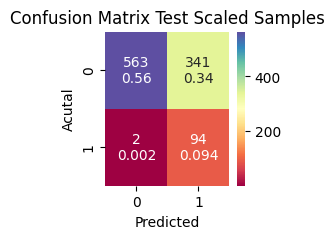

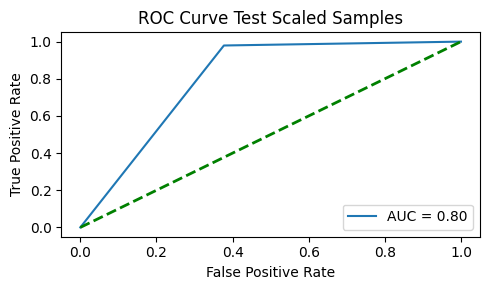

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       1.00      0.63      0.77      3616
           1       0.22      0.99      0.36       384

    accuracy                           0.67      4000
   macro avg       0.61      0.81      0.57      4000
weighted avg       0.92      0.67      0.73      4000



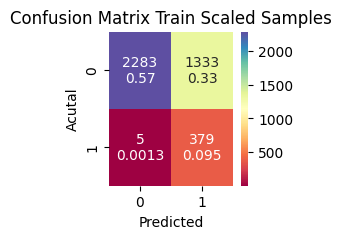

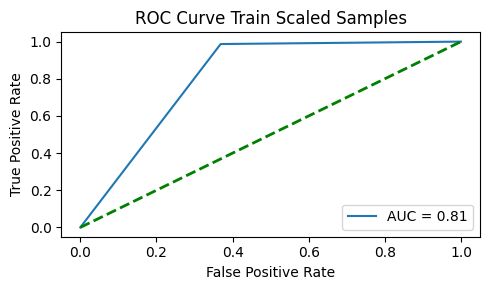

In [ ]:
'''
STATS MODEL LOGISTIC REGRESSION
Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. Tensorflow model for logistic regression
  5. Compute the Metrics
  6. find VIF(high multicolinearity) feature which might impact the perfromance VIF>10 high impact VIF >5 moderate impact
  7.drop high VIF feature
  8. rerun the model
  9. compute the metrics(proablity basis) to get the good coverage
'''


class StatsModel_Logistic(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df,best_tuned_param):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)
    self.best_tuned_param = best_tuned_param

  def Stat_Model_Creation(self):


    Feature_Train,Feature_Test,Target_Train,Target_Test = self.Split_Train_Test() #DATASET SPLIT

    Feature_Train_Scaled, Feature_Test_Scaled = self.Scaler_Transform(Feature_Train,Feature_Test) # DATASET SCALAR TRANSFORMATION
    df_Feature_Train_Scaled = pd.DataFrame(Feature_Train_Scaled,columns=Feature_Train.columns)
    df_Feature_Test_Scaled = pd.DataFrame(Feature_Test_Scaled,columns=Feature_Test.columns)

    Feature_Train_resample, Target_Train_resample =self.SMOTE_Resample(df_Feature_Train_Scaled,Target_Train) # SMOTE RESAMPLING TO BALANCE THE FEATURE AND TARGET

    # without finetuning
    model_logistic_notuning = sm.Logit(Target_Train_resample,Feature_Train_resample) #COMPLETE TREE FIT RUN
    stat_logistic_model_notune = model_logistic_notuning.fit()
    print(stat_logistic_model_notune.summary())

    # Variable Influence Factor Calculation
    # TO CALCULATE THE VARIABLE INFLUENCE FACTOR WHICH CAUSING MULTICOLINEARITY
    Feature_Train_resample = sm.add_constant(Feature_Train_resample)
    VIF_df = pd.DataFrame()
    VIF_df['Features'] = Feature_Train_resample.columns
    VIF_df['VIF'] = [variance_inflation_factor(Feature_Train_resample.values,i) for i in range(Feature_Train_resample.shape[1])]
    print(VIF_df)

    # REMOVING THE COLUMNS WHICH CAUSING HIGH VIF
    Feature_Train_resample = Feature_Train_resample.drop(['const','Experience'],axis=1)
    df_Feature_Test_Scaled = df_Feature_Test_Scaled.drop(['Experience'],axis=1)
    df_Feature_Train_Scaled = df_Feature_Train_Scaled.drop(['Experience'],axis=1)

    VIF_df = pd.DataFrame()
    VIF_df['Features'] = Feature_Train_resample.columns
    VIF_df['VIF After removing column'] = [variance_inflation_factor(Feature_Train_resample.values,i) for i in range(Feature_Train_resample.shape[1])]
    print(VIF_df)


    model_vif = sm.Logit(Target_Train_resample,Feature_Train_resample)
    stat_logistic_model_vif = model_vif.fit_regularized(
        method=self.best_tuned_param['penalty'],
        alpha=1/self.best_tuned_param['C'],
        maxiter=self.best_tuned_param['max_iter'],
        tol=self.best_tuned_param['tol'],
        class_weight=self.best_tuned_param['class_weight'],
        solver=self.best_tuned_param['solver'],
        refit=True
        )
    print(stat_logistic_model_vif.summary())



    # REFIT AND MODEL RERUN
    Test_Prediction_prob = stat_logistic_model_vif.predict(df_Feature_Test_Scaled)
    Test_Prediction = (Test_Prediction_prob >0.5).astype(int)
    df_Test_Metrics = self.Calculating_Metrics(Target_Test,Test_Prediction,'Test Scaled Samples','Logistics','Statsmodel')

    # METRICS CALCULATION
    Train_Prediction_prob = stat_logistic_model_vif.predict(df_Feature_Train_Scaled)
    Train_Prediction = (Train_Prediction_prob >0.5).astype(int)
    df_Train_Metrics = self.Calculating_Metrics(Target_Train,Train_Prediction,'Train Scaled Samples','Logistics','Statsmodel')

    return df_Train_Metrics, df_Test_Metrics

# INVOKE THE CLASS OBJECT
statObject = StatsModel_Logistic(df_LoanModelling,best_fit_sklogistPrameter)
stat_Train_Metric, stat_Test_Metric = statObject.Stat_Model_Creation()
Overall_Test_Metrics = pd.concat([Overall_Test_Metrics,stat_Test_Metric],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([Overall_Train_Metrics,stat_Train_Metric],axis=0,ignore_index=True)

In [ ]:
stat_Train_Metric

,Algorithm,Package Type,Sample Type,Accuracy,Precision,Recall,F1-Score
0,Logistics,Statsmodel,Train Scaled Samples,0.6655,0.221379,0.986979,0.361641


In [ ]:
stat_Test_Metric

,Algorithm,Package Type,Sample Type,Accuracy,Precision,Recall,F1-Score
0,Logistics,Statsmodel,Test Scaled Samples,0.657,0.216092,0.979167,0.354049


## SCKIT LEARN KNN ALGORITHM DEVELOPMENT

----------------------------------------------------------------------------------------------------
Feature data count before split: 5000 rows and  11 columns
Target data count before split: 5000
----------------------------------------------------------------------------------------------------
After Split the dataset
Feature Train: 4000 rows and  11  columns
Feature Test: 1000  rows and  11  columns
Target Train: 4000 rows
Target Test: 1000 rows
----------------------------------------------------------------------------------------------------
After SMOTE Resample
Attribute Train:  7232 rows and  11 columns
Target Train:  7232 rows
Tuning Method:  RandomSearchCV
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameter: {'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'minkowski', 'leaf_size': 50, 'algorithm': 'auto'}
Best Score: 0.9885233029962632
----------------------------------------------------------------------------------------------------
Cal

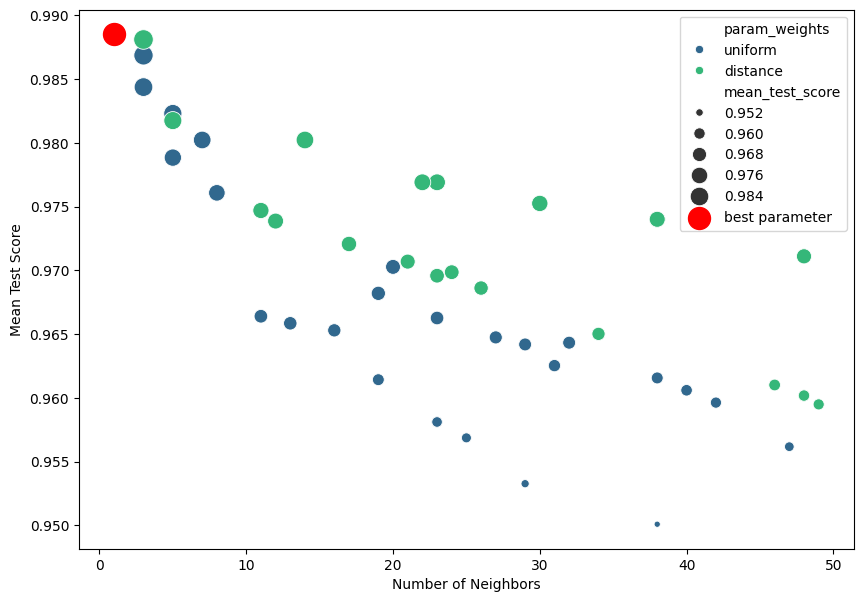

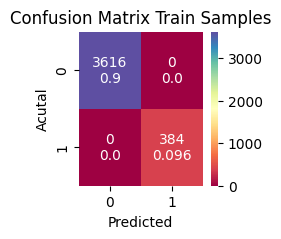

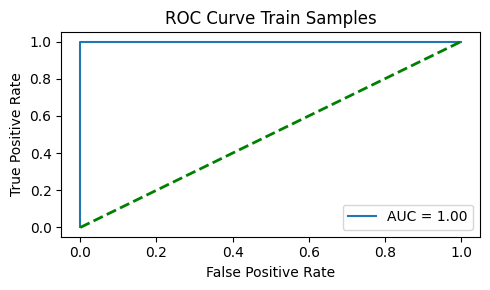

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.83      0.78      0.81        96

    accuracy                           0.96      1000
   macro avg       0.91      0.88      0.89      1000
weighted avg       0.96      0.96      0.96      1000



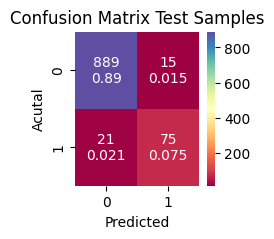

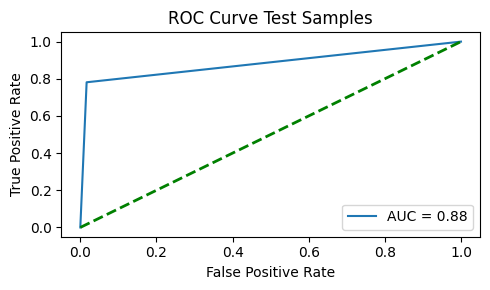

In [ ]:
class Sklearn_KNearestNeighbour(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)
    self.df_KNN = self.df.copy()


    self.Feature_Train,self.Feature_Test,self.Target_Train,self.Target_Test = self.Split_Train_Test() #DATASET SPLIT
    self.Feature_Train_Scaled, self.Feature_Test_Scaled = self.Scaler_Transform(self.Feature_Train,self.Feature_Test) # DATASET SCALAR TRANSFORMATION
    self.df_Feature_Train_Scaled = pd.DataFrame(self.Feature_Train_Scaled,columns=self.Feature_Train.columns)
    self.df_Feature_Test_Scaled = pd.DataFrame(self.Feature_Test_Scaled,columns=self.Feature_Test.columns)
    self.Feature_Train_resample, self.Target_Train_resample =self.SMOTE_Resample(self.df_Feature_Train_Scaled,self.Target_Train) # SMOTE RESAMPLING TO BALANCE THE FEATURE AND TARGET




  def HyperTuning(self):
    hyper_tune_result = {}
    parameter_Value = {'n_neighbors':np.arange(1,50), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute'],
                       'leaf_size':np.arange(10,60,10), 'p':[1,2], 'metric':['euclidean','manhattan','minkowski']}
    modelKnn = KNeighborsClassifier()
    hyper_Tuning = {'RandomSearchCV': RandomizedSearchCV(estimator = modelKnn, param_distributions=parameter_Value,
                                      cv=10, verbose=1, n_jobs=-1, n_iter=50,scoring='accuracy',random_state=42)}
    for method,tune in hyper_Tuning.items():
      print('Tuning Method: ',method)
      tune.fit(self.Feature_Train_resample,self.Target_Train_resample)
      best_model = tune.best_estimator_
      best_parameter = tune.best_params_
      best_score = tune.best_score_
      best_index = tune.best_index_
      tune_cv = tune.cv_results_
      df_tune_cv = pd.DataFrame(tune_cv)

      self.KNN_Plot(df_tune_cv,best_index)

      train_cluster_labels = best_model.predict(self.Feature_Train_Scaled)
      test_cluster_labels = best_model.predict(self.Feature_Test_Scaled)
      cluster_df = pd.DataFrame(index = self.df.index)
      cluster_df['Cluster'] = np.nan
      cluster_df.loc[self.Feature_Train.index, 'Cluster'] = train_cluster_labels
      cluster_df.loc[self.Feature_Test.index, 'Cluster'] = test_cluster_labels
      self.df_KNN =self.df_KNN.join(cluster_df, how='left')
      hyper_tune_result[method] = [best_model,best_parameter,best_score,tune_cv]

      Train_Pred_Proba = best_model.predict_proba(self.Feature_Train_Scaled)[:,1]
      Train_Pred = (Train_Pred_Proba >0.5).astype(int)

      Test_Pred_Proba = best_model.predict_proba(self.Feature_Test_Scaled)[:,1]
      Test_Pred = (Test_Pred_Proba >0.5).astype(int)

      df_KNN_Train_Metrics = self.Calculating_Metrics(self.Target_Train,Train_Pred,'Train Samples','KNN-'+method,'Scikit learn')
      df_KNN_Test_Metrics = self.Calculating_Metrics(self.Target_Test,Test_Pred,'Test Samples','KNN-'+method,'Scikit learn')


    return self.df_KNN,hyper_tune_result, df_KNN_Train_Metrics, df_KNN_Test_Metrics

  def KNN_Plot(self,df_tune,best_index):
    best_param = df_tune.loc[best_index, 'params']
    best_score = df_tune.loc[best_index,'mean_test_score']
    print('Best Parameter:',best_param)
    print('Best Score:',best_score)

    plt.figure(figsize=(10,7))
    sns.scatterplot(x = df_tune['param_n_neighbors'], y=df_tune['mean_test_score'],
                    hue=df_tune['param_weights'].astype(str), size = df_tune['mean_test_score'],
                    sizes = (20,200), palette ='viridis', legend ='auto')

    plt.scatter(x = df_tune.loc[best_index,'param_n_neighbors'],
                y = df_tune.loc[best_index, 'mean_test_score'],
                color = 'red', s=250, label = 'best parameter')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Test Score')
    plt.legend()
    plt.show





KnnObj = Sklearn_KNearestNeighbour(df_LoanModelling)
df_out,tune_param, df_KNN_Train, df_KNN_Test = KnnObj.HyperTuning()

Overall_Test_Metrics = pd.concat([Overall_Test_Metrics,df_KNN_Test],axis=0,ignore_index=True)
Overall_Train_Metrics = pd.concat([Overall_Train_Metrics,df_KNN_Train],axis=0,ignore_index=True)

In [ ]:
df_out['Cluster'].value_counts()

,count
Cluster,
0.0,4526
1.0,474


## OVERALL SUMMARY

In [ ]:


#overall_Train_Metrics = pd.concat([Sk_decisionTree_Train_Metrics,stat_Train_Metric,Train_Metrics_dTree],axis=0)
Overall_Train_Metrics.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Complete Tree,Scikit learn,Train_dataset,1.00000,1.000000,1.000000,1.000000
1,Decision Tree,Tensorflow,Train Scaled Samples,1.00000,1.000000,1.000000,1.000000
2,Post Prune Decision Tree,Tensorflow,Train Scaled Samples,1.00000,1.000000,1.000000,1.000000
3,KNN-RandomSearchCV,Scikit learn,Train Samples,1.00000,1.000000,1.000000,1.000000
4,Post Pruning,Scikit learn,Train_dataset,0.99300,0.979167,0.949495,0.964103
5,Pre pruning Grid Search,Scikit Learn,Train_dataset,0.99200,0.937500,0.978261,0.957447
6,Pre Pruning Randomized Search CV,Scikit learn,Train_dataset,0.99200,0.937500,0.978261,0.957447
7,Pre Prune Decision Tree,Tensorflow,Train Scaled Samples,0.97950,0.861244,0.937500,0.897756
8,Logistics,Scikit learn,Train Scaled Samples,0.89475,0.888021,0.474270,0.618314
9,Logistics,Statsmodel,Train Scaled Samples,0.66550,0.986979,0.221379,0.361641


In [ ]:
Overall_Test_Metrics.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Decision Tree,Tensorflow,Test Scaled Samples,0.97700,0.834862,0.947917,0.887805
1,Pre Prune Decision Tree,Tensorflow,Test Scaled Samples,0.97700,0.841121,0.937500,0.886700
2,Post Prune Decision Tree,Tensorflow,Test Scaled Samples,0.97700,0.834862,0.947917,0.887805
3,Pre pruning Grid Search,Scikit Learn,Test_dataset,0.97625,0.783854,0.961661,0.863702
4,Pre Pruning Randomized Search CV,Scikit learn,Test_dataset,0.97625,0.783854,0.961661,0.863702
5,Post Pruning,Scikit learn,Test_dataset,0.97450,0.781250,0.943396,0.854701
6,Complete Tree,Scikit learn,Test_dataset,0.97200,0.768229,0.927673,0.840456
7,KNN-RandomSearchCV,Scikit learn,Test Samples,0.96400,0.781250,0.833333,0.806452
8,Logistics,Scikit learn,Test Scaled Samples,0.90400,0.916667,0.500000,0.647059
9,Logistics,Statsmodel,Test Scaled Samples,0.65700,0.979167,0.216092,0.354049


## Recomendation
From Data Analyst view following are my recommendation to leverage the Bank to increase their customer to purchase the loan

* from Heatmap ==> Customers with High income, CD(50% Certification of deposit holder taken loan) and high CCAvg has more tendency to take loan because of their earning capacity, so Bank to focus on these category of the customer on priority


* Bank to improve the campgain to increase the user to adopt to Online banking which help the bank to attract the customer, its clear evident that more than 90$ of non-online facilites user not purchased loan
* Offering discounted intrest and discount repayment charge/pre-closure charges can attract the customer
* Improvised customer service and simplified loan procedure helps to leverage the count of loan account


## Conclusion
# Decision Tree Algorithm (Scikit learn & Tensorflow):
* from the hyper parameter tuning with Grid search and Randomized search the Attributes CCAvg & high Income & CD has strongly corelated which helps the bank to find these sector customer to focus and to maken them to get loan
* here hyperparametr fine tuning helps to create the optimized model for prediction

# Logistics Algorithm(Scikit learn & STATModel)
* Attribute Age & Experience caused the Variance Influence Factor so removed the Attribure Experience and trained the Mode using Scikit package with RandomizedsearcCV hyperparameter tuning to generate the model with good metrics model
* the best parameter from hypertuning was feed to the STAT model logistic system but this poor metrics, this due to imbalance in dataset

# KNN Scikit learn
* here from the hyperparameter tuning by randomized search the best KNN received is 1(k=1) which implies that the model will sensitive to noise to new dataset
* this model is overfiting and high variance




***REFERNCES***
1. Great Learning Video & Reference material for the Machine learning Alorithm by Professor. Kumar Muthuram Faculty McCombs school of Business, UT Austin & Professor. Abinanda Sarkar Sr. Faculty Data Science.
Link: https://olympus.mygreatlearning.com/courses/121701?th=co&pb_id=18194


2. Scikit Learn Decision Tree: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

3. Scikit learn RandomizedsearchCV: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

4. Scikitlearn GridsearchCV: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

5. Scikit Learn Logistic Algorithm: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

6. Tensorflow Logistic Regression Alogrithm: https://www.tensorflow.org/guide/core/logistic_regression_core

7. Scikit learn Clustering alogrithm: https://scikit-learn.org/1.5/modules/clustering.html

8. Tensorflow: Clustering algorithm: https://www.tensorflow.org/federated/api_docs/python/tff/learning/algorithms/build_fed_kmeans?form=MG0AV3
